In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


### Factor Analysis

In [2]:
data = pd.read_excel('../data/survey_full.xlsx')

In [3]:
data.head()

,Timestamp,What is your age group?,What is your gender?,What is your primary occupation?,What is your monthly household income (INR)?,Which best describes your area of residence?,How often do you consume roti?,What are your primary sources of protein? (Select all that apply),How do you usually prepare or purchase roti? (Select all that apply),Have you ever purchased ready-to-cook or packaged rotis?,...,How likely are you to rely on online reviews/influencers or digital recommendations when choosing a new food product?,Would you be interested in trying a small sample or trial pack of a protein-enhanced ready-to-cook roti?,"If you are willing to try such a product, what would be your ideal pack size?",We’d love to hear your thoughts! Any additional comments or suggestions about protein-enhanced rotis?\nYou can also contact us at : t3b4grp@iima.ac.in,How frequently do you go to the gym or engage in regular exercise?,How sensitive are you to the shelf life of packaged food products?,How important is the shelf life of packaged food products for you?,How sensitive are you to preservatives in packaged food?,Do you prefer longer shelf life for packaged foods?,Column 34
0,2025-02-17 20:22:54.167,25–34,Male,Student,"More than 1,00,000",Urban,Daily,"Dairy (Milk, Paneer, Yogurt), Eggs",Make it fresh at home,No,...,2,Yes,Pack of 4 rotis,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-02-17 20:33:28.951,18–24,Male,Student,Prefer not to say,Urban,Daily,"Dairy (Milk, Paneer, Yogurt), Lentils & Pulses...",Make it fresh at home,No,...,1,No,Pack of 4 rotis,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-02-17 20:51:11.003,25–34,Male,Working professional,"More than 1,00,000",Urban,Daily,"Dairy (Milk, Paneer, Yogurt), Lentils & Pulses",Make it fresh at home,No,...,4,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-02-17 20:57:32.880,25–34,Male,Student,"50,000-1,00,000",Urban,2–3 times a week 3,"Eggs, Meat & Poultry, Protein Bars/Supplements","Make it fresh at home, Buy ready-to-eat packag...",Yes,...,3,Yes,Pack of 6 rotis,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-02-17 21:55:58.597,25–34,Male,Student,Prefer not to say,Semi-urban,4–6 times a week,"Eggs, Meat & Poultry",Buy from a restaurant,Yes,...,5,Yes,Pack of 4 rotis,NaN,Once a week,I prefer products with a longer shelf life but...,NaN,NaN,NaN,NaN


In [4]:
# list(data.columns).index('Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important)   [Taste & Texture]')

In [5]:
list(data[::].columns[13:19])

['Please rate the importance of the following factors when you may purchase a ready-`',
 'Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important)   [Nutritional value (including protein content)]',
 'Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important)   [Shelf-life]',
 'Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important)   [Price]',
 'Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important)   [Packaging design]',
 'Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(

In [6]:
data.iloc[:, 13:20]

,Please rate the importance of the following factors when you may purchase a ready-`,"Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important) [Nutritional value (including protein content)]","Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important) [Shelf-life]","Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important) [Price]","Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important) [Packaging design]","Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important) [Brand trust]","Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important) [Convenience]"
0,Somewhat Important,Neutral,Somewhat Important,Neutral,Not important,Less Important,Somewhat Important
1,Not important,Not important,Not important,Not important,Not important,Not important,Not important
2,NaN,Somewhat Important,Neutral,Neutral,Neutral,Somewhat Important,Somewhat Important
3,NaN,Very Important,Somewhat Important,Neutral,Very Important,Neutral,Neutral
4,NaN,Not important,Less Important,Neutral,Neutral,Neutral,Very Important
...,...,...,...,...,...,...,...
108,NaN,Very Important,Somewhat Important,Neutral,Less Important,Less Important,Somewhat Important
109,NaN,Neutral,Somewhat Important,Somewhat Important,Less Important,Very Important,Somewhat Important
110,NaN,Very Important,Somewhat Important,Somewhat Important,Neutral,Somewhat Important,Somewhat Important
111,NaN,Less Important,Less Important,Somewhat Important,Somewhat Important,Very Important,Very Important


In [7]:
df = data.iloc[:, 14:20]
df.rename(columns = dict(zip(list(data[::].columns[14:20]), ['Nutritional value', 'Shelf-life', 'Price', 'Packaging design',
       'Brand trust', 'Convenience'])) , inplace = True)

In [8]:
df.head()

,Nutritional value,Shelf-life,Price,Packaging design,Brand trust,Convenience
0,Neutral,Somewhat Important,Neutral,Not important,Less Important,Somewhat Important
1,Not important,Not important,Not important,Not important,Not important,Not important
2,Somewhat Important,Neutral,Neutral,Neutral,Somewhat Important,Somewhat Important
3,Very Important,Somewhat Important,Neutral,Very Important,Neutral,Neutral
4,Not important,Less Important,Neutral,Neutral,Neutral,Very Important


In [9]:
len(df)

113

In [10]:
# # Load the data
# df = pd.read_excel('../data/factor_data.xlsx')
# df = df.dropna()    
# len(df)

In [11]:
# df.columns

In [12]:
df.head()

,Nutritional value,Shelf-life,Price,Packaging design,Brand trust,Convenience
0,Neutral,Somewhat Important,Neutral,Not important,Less Important,Somewhat Important
1,Not important,Not important,Not important,Not important,Not important,Not important
2,Somewhat Important,Neutral,Neutral,Neutral,Somewhat Important,Somewhat Important
3,Very Important,Somewhat Important,Neutral,Very Important,Neutral,Neutral
4,Not important,Less Important,Neutral,Neutral,Neutral,Very Important


In [13]:
# Define the mapping
mapping = {
    'Not important': 1,
    'Less Important': 2,
    'Neutral': 3,
    'Somewhat Important': 4,
    'Very Important': 5
}

# Apply the mapping to the dataframe
factors = df.replace(mapping)
factors.head()

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\1701761953.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  factors = df.replace(mapping)


,Nutritional value,Shelf-life,Price,Packaging design,Brand trust,Convenience
0,3,4,3,1,2,4
1,1,1,1,1,1,1
2,4,3,3,3,4,4
3,5,4,3,5,3,3
4,1,2,3,3,3,5


In [14]:
# Calculate the correlation matrix
correlation_matrix = factors.corr()

# Plot the heatmap using Plotly
fig = px.imshow(correlation_matrix, 
                labels=dict(color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='Viridis')

fig.update_layout(title='Factor Analysis-Correlation Matrix Heatmap')
fig.show()

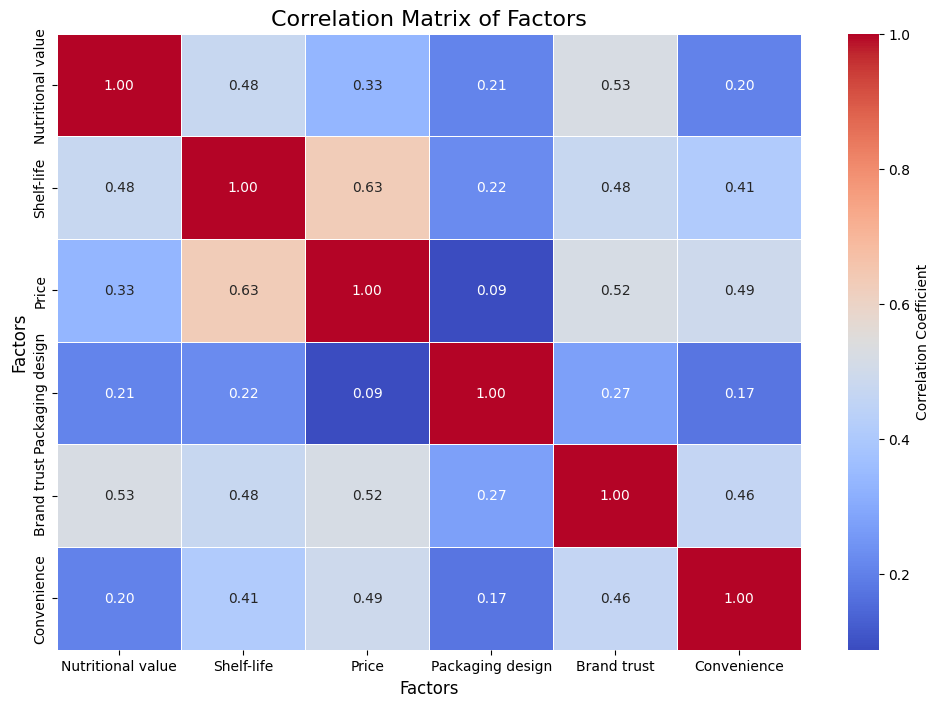

In [201]:
# Calculate the correlation matrix
correlation_matrix = factors.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'}, linewidths=.5)

# Add titles and labels
plt.title('Correlation Matrix of Factors', fontsize=16)
plt.xlabel('Factors', fontsize=12)
plt.ylabel('Factors', fontsize=12)

# Show the plot
plt.show()

In [200]:
correlation_matrix

,Nutritional value,Shelf-life,Price,Packaging design,Brand trust,Convenience
Nutritional value,1.000000,0.475357,0.333408,0.205008,0.525729,0.201338
Shelf-life,0.475357,1.000000,0.630002,0.224584,0.475866,0.411000
Price,0.333408,0.630002,1.000000,0.087237,0.519005,0.490965
Packaging design,0.205008,0.224584,0.087237,1.000000,0.274176,0.174943
Brand trust,0.525729,0.475866,0.519005,0.274176,1.000000,0.461701
Convenience,0.201338,0.411000,0.490965,0.174943,0.461701,1.000000


In [15]:
correlation_matrix

,Nutritional value,Shelf-life,Price,Packaging design,Brand trust,Convenience
Nutritional value,1.000000,0.475357,0.333408,0.205008,0.525729,0.201338
Shelf-life,0.475357,1.000000,0.630002,0.224584,0.475866,0.411000
Price,0.333408,0.630002,1.000000,0.087237,0.519005,0.490965
Packaging design,0.205008,0.224584,0.087237,1.000000,0.274176,0.174943
Brand trust,0.525729,0.475866,0.519005,0.274176,1.000000,0.461701
Convenience,0.201338,0.411000,0.490965,0.174943,0.461701,1.000000


In [16]:
import factor_analyzer
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_vars,kmo_model = calculate_kmo(factors)

In [202]:
print('Kaiser-Meyer-Olkin (KMO) Measure of Sampling Adequacy', kmo_model)

Kaiser-Meyer-Olkin (KMO) Measure of Sampling Adequacy 0.7527125637762601


In [18]:
kmo_vars

array([0.72293352, 0.75383792, 0.73096475, 0.71480938, 0.76707265,
       0.8094535 ])

In [19]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi2,p = calculate_bartlett_sphericity(factors)
print("Chi squared value : ",chi2)
print("p value : ",p)

Chi squared value :  195.9704434848456
p value :  1.397815790664528e-33


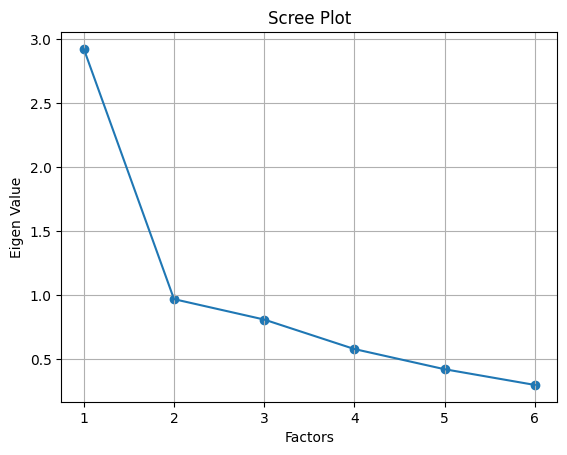

In [20]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation = None,method='principal',impute = "drop",n_factors=factors.shape[1])
fa.fit(factors)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,factors.shape[1]+1),ev)
plt.plot(range(1,factors.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

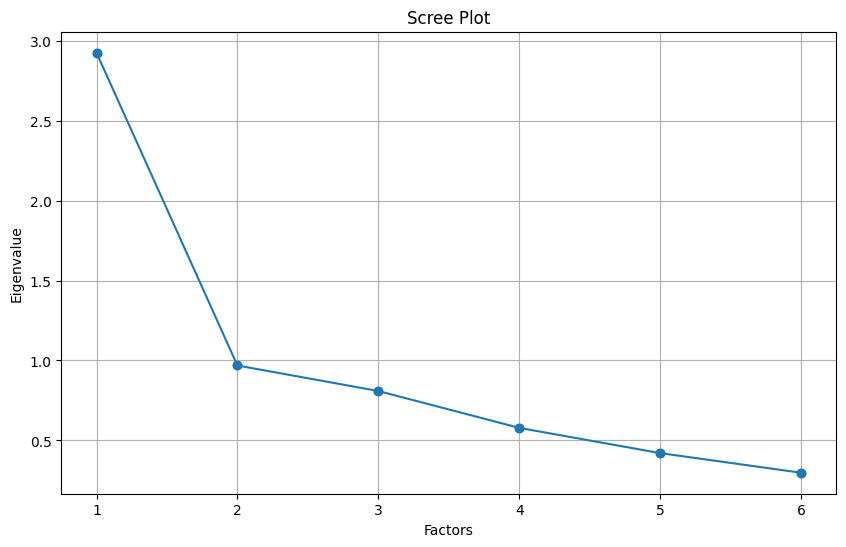

In [21]:
from factor_analyzer import FactorAnalyzer

import matplotlib.pyplot as plt

# Initialize the FactorAnalyzer with PCA method
fa = FactorAnalyzer(rotation=None, method='principal', n_factors=factors.shape[1])
fa.fit(factors)

# Get eigenvalues
ev, _ = fa.get_eigenvalues()

# Create scree plot
plt.figure(figsize=(10, 6))
plt.scatter(range(1, factors.shape[1] + 1), ev)
plt.plot(range(1, factors.shape[1] + 1), ev, marker='o')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [23]:
ev

array([2.9255018 , 0.9686503 , 0.80901864, 0.57841754, 0.42060415,
       0.29780757])

In [24]:
#rotated_component_matrix
fa = FactorAnalyzer(n_factors=2,rotation='varimax')
fa.fit(factors)
print(pd.DataFrame(fa.loadings_,index=factors.columns))

                          0         1
Nutritional value  0.247784  0.601261
Shelf-life         0.562129  0.461837
Price              0.989573  0.138058
Packaging design   0.058427  0.370202
Brand trust        0.425633  0.665762
Convenience        0.464412  0.303155


In [25]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1
Variance          1.756896  1.266061
Proportional Var  0.292816  0.211010
Cumulative Var    0.292816  0.503826


In [26]:
print(pd.DataFrame(fa.get_communalities(),index=factors.columns,columns=['Communalities']))

                   Communalities
Nutritional value       0.422912
Shelf-life              0.529283
Price                   0.998315
Packaging design        0.140463
Brand trust             0.624403
Convenience             0.307581


In [27]:
rotated_component_matrix = pd.DataFrame(fa.loadings_, index=factors.columns)
print(rotated_component_matrix)

                          0         1
Nutritional value  0.247784  0.601261
Shelf-life         0.562129  0.461837
Price              0.989573  0.138058
Packaging design   0.058427  0.370202
Brand trust        0.425633  0.665762
Convenience        0.464412  0.303155


### PCA

In [28]:
list(data.columns).index('Would you be interested in trying a small sample or trial pack of a protein-enhanced ready-to-cook roti?')

28

In [29]:
interest = data.iloc[::, 28]

In [30]:
mapping = {
    'Yes': 1,
    'No': 0,
    'Maybe': 0.5
}

# Apply the mapping to the dataframe
interest = interest.replace(mapping)
interest.head()

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\181251922.py:8: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



0    1.0
1    0.0
2    0.0
3    1.0
4    1.0
Name: Would you be interested in trying a small sample or trial pack of a protein-enhanced ready-to-cook roti?, dtype: float64

In [31]:
y = interest.values

In [32]:
factors

,Nutritional value,Shelf-life,Price,Packaging design,Brand trust,Convenience
0,3,4,3,1,2,4
1,1,1,1,1,1,1
2,4,3,3,3,4,4
3,5,4,3,5,3,3
4,1,2,3,3,3,5
...,...,...,...,...,...,...
108,5,4,3,2,2,4
109,3,4,4,2,5,4
110,5,4,4,3,4,4
111,2,2,4,4,5,5


In [33]:
from sklearn.decomposition import PCA
# Perform PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(factors)

In [34]:
eigenvalues = pca.explained_variance_
print(eigenvalues)

[3.81081026 1.25891245]


In [35]:
pca.explained_variance_ratio_

array([0.48484644, 0.16017046])

In [36]:
fa._fit_principal(factors.values)

array([[-0.66262441,  0.24043319],
       [-0.80372359, -0.10026095],
       [-0.78120414, -0.37505583],
       [-0.37464717,  0.83139686],
       [-0.80332734,  0.08506835],
       [-0.66669623, -0.24832576]])

### Regression

In [37]:
X = reduced_data
Y = y

In [38]:
import statsmodels.api as sm
from scipy import stats

x = sm.add_constant(X)
model = sm.OLS(Y, x)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     4.493
Date:                Sun, 02 Mar 2025   Prob (F-statistic):             0.0133
Time:                        21:25:43   Log-Likelihood:                -29.948
No. Observations:                 113   AIC:                             65.90
Df Residuals:                     110   BIC:                             74.08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8097      0.030     26.926      0.0

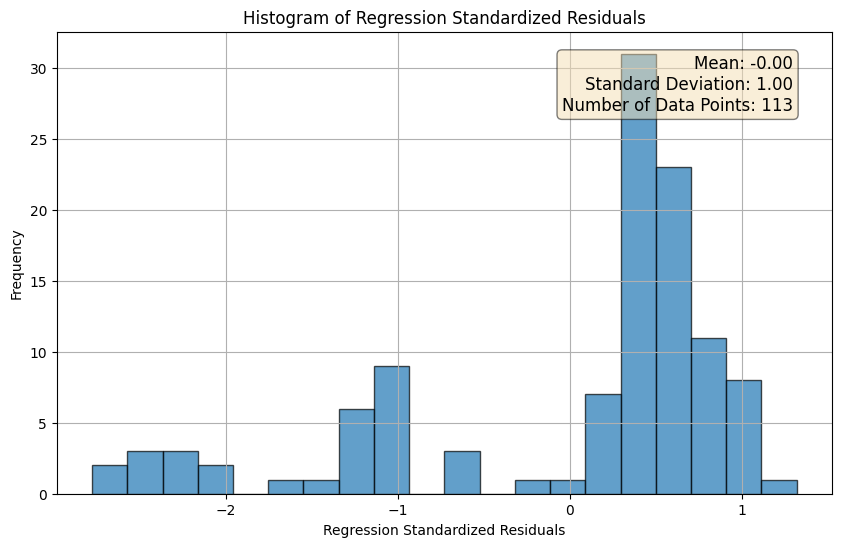

In [39]:
# Calculate the standardized residuals
standardized_residuals = (model.resid - np.mean(model.resid)) / np.std(model.resid)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(standardized_residuals, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Regression Standardized Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Regression Standardized Residuals')

# Calculate statistics
mean_resid = np.mean(standardized_residuals)
std_resid = np.std(standardized_residuals)
num_data_points = len(standardized_residuals)

# Add text box with statistics
textstr = '\n'.join((
    f'Mean: {mean_resid:.2f}',
    f'Standard Deviation: {std_resid:.2f}',
    f'Number of Data Points: {num_data_points}'
))

# Place the text box in the plot
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.gca().text(0.95, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
               verticalalignment='top', horizontalalignment='right', bbox=props)

plt.grid(True)
plt.show()

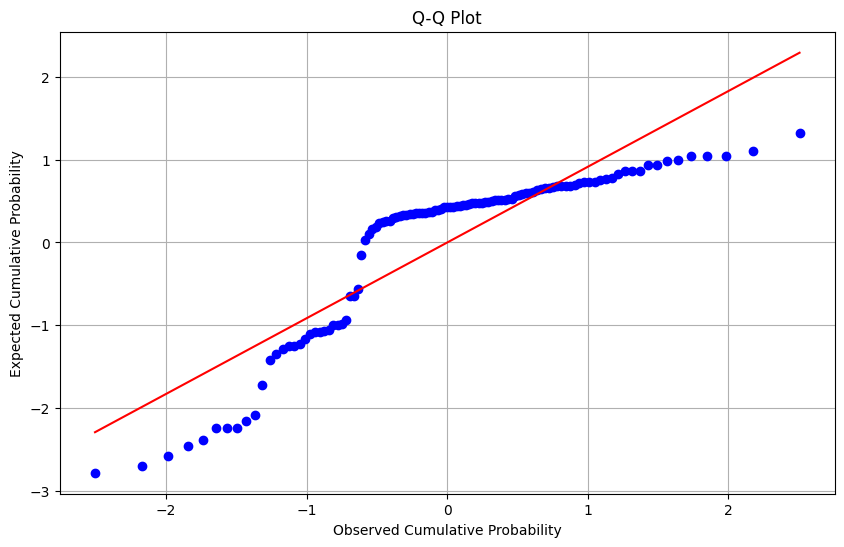

In [40]:
import scipy.stats as stats

# Generate a Q-Q plot
fig, ax = plt.subplots(figsize=(10, 6))
stats.probplot(standardized_residuals, dist="norm", plot=ax)
ax.set_title('Q-Q Plot')
ax.set_xlabel('Observed Cumulative Probability')
ax.set_ylabel('Expected Cumulative Probability')
plt.grid(True)
plt.show()

### Data cleaning

In [41]:
data.columns

Index(['Timestamp', 'What is your age group?', 'What is your gender?  ',
       'What is your primary occupation?',
       'What is your monthly household income (INR)?',
       '  Which best describes your area of residence?  ',
       'How often do you consume roti?',
       'What are your primary sources of protein? (Select all that apply)',
       'How do you usually prepare or purchase roti? (Select all that apply)',
       'Have you ever purchased ready-to-cook or packaged rotis?',
       'How often do you purchase ready-to-cook or packaged rotis? (If your response is Yes/Maybe for previous question)',
       'How actively do you ensure enough protein is in your daily diet?',
       'Which of the following protein-enhanced products have you heard of before? (Select all that apply)',
       'Please rate the importance of the following factors when you may purchase a ready-`',
       'Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(

In [42]:
df = data.copy()


In [43]:
list(df[::].columns[14:20])

['Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important)   [Nutritional value (including protein content)]',
 'Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important)   [Shelf-life]',
 'Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important)   [Price]',
 'Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important)   [Packaging design]',
 'Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important)   [Brand tr

In [44]:
df.rename(columns = dict(zip(list(df[::].columns[14:20]), ['Nutritional value', 'Shelf-life', 'Price', 'Packaging design',
       'Brand trust', 'Convenience'])) , inplace = True)


# drop the columns
df.drop(['Timestamp','Column 34'], axis=1, inplace=True)
# df.drop('Please rate the importance of the following factors when you may purchase a ready-to-cook roti.\n(For each attribute, use a scale where 1 = Not important, 5 = Very important)   [Taste & Texture]', axis=1, inplace=True)
df.drop('We’d love to hear your thoughts! Any additional comments or suggestions about protein-enhanced rotis?\nYou can also contact us at :  t3b4grp@iima.ac.in', axis=1, inplace=True)

In [45]:
list(df[::].columns[0:12])

['What is your age group?',
 'What is your gender?  ',
 'What is your primary occupation?',
 'What is your monthly household income (INR)?',
 '  Which best describes your area of residence?  ',
 'How often do you consume roti?',
 'What are your primary sources of protein? (Select all that apply)',
 'How do you usually prepare or purchase roti? (Select all that apply)',
 'Have you ever purchased ready-to-cook or packaged rotis?',
 'How often do you purchase ready-to-cook or packaged rotis? (If your response is Yes/Maybe for previous question)',
 'How actively do you ensure enough protein is in your daily diet?',
 'Which of the following protein-enhanced products have you heard of before? (Select all that apply)']

In [46]:
len(list(df[::].columns[0:12])), len(['Age', 'Gender', 'Occupation', 'Income', 'Location', 'Consumption frequency',
                                                                              'Protein Source', 'Buying behaviour', 'is_RTC_customer',
                                                                              'RTC_customer_frequency', 'protein_concious','protein_products_awareness'])

(12, 12)

In [47]:
df.rename(columns = dict(zip(list(df[::].columns[0:12]), ['Age', 'Gender', 'Occupation', 'Income', 'Location', 'Consumption frequency',
                                                                              'Protein Source', 'Buying behaviour', 'is_RTC_customer',
                                                                              'RTC_customer_frequency', 'protein_concious','protein_products_awareness'])) , inplace = True)

In [48]:
list(df.columns).index('What concerns might prevent you from purchasing protein rotis? (Select all that apply)')

19

In [49]:
list(df.columns).index('Do you prefer longer shelf life for packaged foods?')

33

In [50]:
len(['Concerns', 'WTP', 'Channels', 'Channel_selection_driver', 'RTC_current_satisfaction_score', 'challenges', 'information_sources', 'digital_rec_preference', 'interest', 
 'packet_size_preference', 'gym_frequency', 'shelf_life_sensitivity', 'shelf_life_importance' ,'preservative_sensitivity', 'shelf_life_preference'])

15

In [51]:
(list(df[::].columns[19:34]))

['What concerns might prevent you from purchasing protein rotis? (Select all that apply)',
 'At what price point would you consider a pack of 4 protein rotis to be fair?',
 'Which of the following channels do you usually use to purchase ready-to-cook or packaged food items? (Select all that apply)',
 'What are your reasons for choosing your preferred purchase channel?(Select all that apply)',
 'How satisfied are you with the current ready-to-cook food options available in the market?',
 'What challenges, if any, have you experienced when purchasing ready-to-cook food products? (Select all that apply)',
 'How do you usually learn about new food products? (Select all that apply)',
 'How likely are you to rely on online reviews/influencers or digital recommendations when choosing a new food product?',
 'Would you be interested in trying a small sample or trial pack of a protein-enhanced ready-to-cook roti?',
 'If you are willing to try such a product, what would be your ideal pack size?',

In [52]:
len(list(df[::].columns[19:34]))

15

In [53]:
list(df[::].columns[19:34])

['What concerns might prevent you from purchasing protein rotis? (Select all that apply)',
 'At what price point would you consider a pack of 4 protein rotis to be fair?',
 'Which of the following channels do you usually use to purchase ready-to-cook or packaged food items? (Select all that apply)',
 'What are your reasons for choosing your preferred purchase channel?(Select all that apply)',
 'How satisfied are you with the current ready-to-cook food options available in the market?',
 'What challenges, if any, have you experienced when purchasing ready-to-cook food products? (Select all that apply)',
 'How do you usually learn about new food products? (Select all that apply)',
 'How likely are you to rely on online reviews/influencers or digital recommendations when choosing a new food product?',
 'Would you be interested in trying a small sample or trial pack of a protein-enhanced ready-to-cook roti?',
 'If you are willing to try such a product, what would be your ideal pack size?',

In [54]:
df['How sensitive are you to preservatives in packaged food?'].isna().sum()

9

In [55]:
len((df[::].columns[19:34]))

15

In [56]:
len(['Concerns', 'WTP', 'Channels', 'Channel_selection_driver', 'RTC_current_satisfaction_score', 
                                                                               'challenges', 'information_sources', 'digital_rec_preference', 'interest', 
                                                                               'packet_size_preference', 'gym_frequency', 'shelf_life_sensitivity', 'shelf_life_importance',
                                                                               'preservative_sensitivity', 'shelf_life_preference'])

15

In [57]:
df.rename(columns = dict(zip(list(df[::].columns[19:34]), ['Concerns', 'WTP', 'Channels', 'Channel_selection_driver', 'RTC_current_satisfaction_score', 
                                                                               'challenges', 'information_sources', 'digital_rec_preference', 'interest', 
                                                                               'packet_size_preference', 'gym_frequency', 'shelf_life_sensitivity', 'shelf_life_importance',
                                                                               'preservative_sensitivity', 'shelf_life_preference'])) , inplace = True)

In [58]:
df.columns

Index(['Age', 'Gender', 'Occupation', 'Income', 'Location',
       'Consumption frequency', 'Protein Source', 'Buying behaviour',
       'is_RTC_customer', 'RTC_customer_frequency', 'protein_concious',
       'protein_products_awareness',
       'Please rate the importance of the following factors when you may purchase a ready-`',
       'Nutritional value', 'Shelf-life', 'Price', 'Packaging design',
       'Brand trust', 'Convenience', 'Concerns', 'WTP', 'Channels',
       'Channel_selection_driver', 'RTC_current_satisfaction_score',
       'challenges', 'information_sources', 'digital_rec_preference',
       'interest', 'packet_size_preference', 'gym_frequency',
       'shelf_life_sensitivity', 'shelf_life_importance',
       'preservative_sensitivity', 'shelf_life_preference'],
      dtype='object')

In [59]:
df.head()

,Age,Gender,Occupation,Income,Location,Consumption frequency,Protein Source,Buying behaviour,is_RTC_customer,RTC_customer_frequency,...,challenges,information_sources,digital_rec_preference,interest,packet_size_preference,gym_frequency,shelf_life_sensitivity,shelf_life_importance,preservative_sensitivity,shelf_life_preference
0,25–34,Male,Student,"More than 1,00,000",Urban,Daily,"Dairy (Milk, Paneer, Yogurt), Eggs",Make it fresh at home,No,Never,...,"Short shelf-life, High price, Lack of variety","Social media, Word of mouth, Online reviews",2,Yes,Pack of 4 rotis,NaN,NaN,NaN,NaN,NaN
1,18–24,Male,Student,Prefer not to say,Urban,Daily,"Dairy (Milk, Paneer, Yogurt), Lentils & Pulses...",Make it fresh at home,No,Never,...,"Short shelf-life, Inconsistent quality, High p...","TV or radio commercials, In-store promotions, ...",1,No,Pack of 4 rotis,NaN,NaN,NaN,NaN,NaN
2,25–34,Male,Working professional,"More than 1,00,000",Urban,Daily,"Dairy (Milk, Paneer, Yogurt), Lentils & Pulses",Make it fresh at home,No,Never,...,"Short shelf-life, Contents of preservative",Social media,4,No,NaN,NaN,NaN,NaN,NaN,NaN
3,25–34,Male,Student,"50,000-1,00,000",Urban,2–3 times a week 3,"Eggs, Meat & Poultry, Protein Bars/Supplements","Make it fresh at home, Buy ready-to-eat packag...",Yes,Sometimes,...,"Limited availability, Unclear nutritional info...","Social media, TV or radio commercials, Word of...",3,Yes,Pack of 6 rotis,NaN,NaN,NaN,NaN,NaN
4,25–34,Male,Student,Prefer not to say,Semi-urban,4–6 times a week,"Eggs, Meat & Poultry",Buy from a restaurant,Yes,Often,...,"Inconsistent quality, High price, Limited avai...",In-store promotions,5,Yes,Pack of 4 rotis,Once a week,I prefer products with a longer shelf life but...,NaN,NaN,NaN


In [204]:
df['packet_size_preference'].isna().sum()

1

In [60]:
from ydata_profiling import ProfileReport

# Generate the profile report
profile = ProfileReport(df, title="Data Cluster Profile Report", explorative=True)

# Save the report as an HTML file
profile.to_file("../output/eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [61]:
df.columns

Index(['Age', 'Gender', 'Occupation', 'Income', 'Location',
       'Consumption frequency', 'Protein Source', 'Buying behaviour',
       'is_RTC_customer', 'RTC_customer_frequency', 'protein_concious',
       'protein_products_awareness',
       'Please rate the importance of the following factors when you may purchase a ready-`',
       'Nutritional value', 'Shelf-life', 'Price', 'Packaging design',
       'Brand trust', 'Convenience', 'Concerns', 'WTP', 'Channels',
       'Channel_selection_driver', 'RTC_current_satisfaction_score',
       'challenges', 'information_sources', 'digital_rec_preference',
       'interest', 'packet_size_preference', 'gym_frequency',
       'shelf_life_sensitivity', 'shelf_life_importance',
       'preservative_sensitivity', 'shelf_life_preference'],
      dtype='object')

In [62]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

Age                                                                                      0.000000
Gender                                                                                   0.000000
Occupation                                                                               0.000000
Income                                                                                   0.000000
Location                                                                                 2.654867
Consumption frequency                                                                    0.000000
Protein Source                                                                           0.000000
Buying behaviour                                                                         0.000000
is_RTC_customer                                                                          0.000000
RTC_customer_frequency                                                                   7.964602
protein_concious    

In [63]:
# Drop columns with more than 90% missing values
threshold = 0.90
df = df.loc[:, df.isnull().mean() < threshold]

In [64]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

Age                               0.000000
Gender                            0.000000
Occupation                        0.000000
Income                            0.000000
Location                          2.654867
Consumption frequency             0.000000
Protein Source                    0.000000
Buying behaviour                  0.000000
is_RTC_customer                   0.000000
RTC_customer_frequency            7.964602
protein_concious                  0.000000
protein_products_awareness        0.000000
Nutritional value                 0.000000
Shelf-life                        0.000000
Price                             0.000000
Packaging design                  0.000000
Brand trust                       0.000000
Convenience                       0.000000
Concerns                          2.654867
WTP                               0.000000
Channels                          0.000000
Channel_selection_driver          0.000000
RTC_current_satisfaction_score    0.000000
challenges 

In [65]:
df['WTP']

0         ₹60-₹80
1       Below ₹40
2         ₹40-₹60
3      Above ₹100
4         ₹40-₹60
          ...    
108       ₹40-₹60
109       ₹40-₹60
110       ₹60-₹80
111       ₹60-₹80
112       ₹40-₹60
Name: WTP, Length: 113, dtype: object

In [66]:
df['WTP'][1].replace('₹', '').split(' ')[1]

'40'

In [67]:
df.columns

Index(['Age', 'Gender', 'Occupation', 'Income', 'Location',
       'Consumption frequency', 'Protein Source', 'Buying behaviour',
       'is_RTC_customer', 'RTC_customer_frequency', 'protein_concious',
       'protein_products_awareness', 'Nutritional value', 'Shelf-life',
       'Price', 'Packaging design', 'Brand trust', 'Convenience', 'Concerns',
       'WTP', 'Channels', 'Channel_selection_driver',
       'RTC_current_satisfaction_score', 'challenges', 'information_sources',
       'digital_rec_preference', 'interest', 'packet_size_preference',
       'gym_frequency', 'preservative_sensitivity', 'shelf_life_preference'],
      dtype='object')

In [68]:
len(df.describe(include='O').columns)

28

In [69]:
df['Age'].unique()

array(['25–34', '18–24', '50+', '35–50'], dtype=object)

In [70]:
age_mapping = {
    "18–24": 1, "25–34": 2, "35–50": 3, "50+": 4
}
df['Age'] = df['Age'].map(age_mapping)

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\1539808336.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
df['Age'].unique()

array([2, 1, 4, 3], dtype=int64)

In [72]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [73]:
df.describe(include='O').columns

Index(['Gender', 'Occupation', 'Income', 'Location', 'Consumption frequency',
       'Protein Source', 'Buying behaviour', 'is_RTC_customer',
       'RTC_customer_frequency', 'protein_concious',
       'protein_products_awareness', 'Nutritional value', 'Shelf-life',
       'Price', 'Packaging design', 'Brand trust', 'Convenience', 'Concerns',
       'WTP', 'Channels', 'Channel_selection_driver', 'challenges',
       'information_sources', 'interest', 'packet_size_preference',
       'gym_frequency', 'shelf_life_preference'],
      dtype='object')

In [74]:
df['Buying behaviour'] = df['Buying behaviour'].apply(lambda x: x.split(', '))

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\2830667115.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [75]:
dummies = df['Buying behaviour'].str.get_dummies(sep=', ')

In [76]:
is_rtc_cust = dummies['[\'Buy ready-to-cook packaged rotis\''].values + dummies['\'Buy ready-to-eat packaged rotis\''].values

In [77]:
is_rtc_cust = [min(x, 1) for x in is_rtc_cust]

In [78]:
is_making_at_home = dummies['[\'Make it fresh at home\''].values + dummies['[\'Make it fresh at home\']'].values
is_making_at_home = [min(x, 1) for x in is_making_at_home]

In [79]:
df['is_rtc_cust'] = is_rtc_cust
df['is_making_at_home'] = is_making_at_home
df.drop('Buying behaviour', axis=1, inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\751902655.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\751902655.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\751902655.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [80]:
df.describe(include='O').columns

Index(['Gender', 'Occupation', 'Income', 'Location', 'Consumption frequency',
       'Protein Source', 'is_RTC_customer', 'RTC_customer_frequency',
       'protein_concious', 'protein_products_awareness', 'Nutritional value',
       'Shelf-life', 'Price', 'Packaging design', 'Brand trust', 'Convenience',
       'Concerns', 'WTP', 'Channels', 'Channel_selection_driver', 'challenges',
       'information_sources', 'interest', 'packet_size_preference',
       'gym_frequency', 'shelf_life_preference'],
      dtype='object')

In [81]:
nominal_columns = ['Gender', 'Occupation', 'Location']
for col in nominal_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\505169083.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\505169083.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\505169083.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [82]:
df.describe(include='O').columns

Index(['Income', 'Consumption frequency', 'Protein Source', 'is_RTC_customer',
       'RTC_customer_frequency', 'protein_concious',
       'protein_products_awareness', 'Nutritional value', 'Shelf-life',
       'Price', 'Packaging design', 'Brand trust', 'Convenience', 'Concerns',
       'WTP', 'Channels', 'Channel_selection_driver', 'challenges',
       'information_sources', 'interest', 'packet_size_preference',
       'gym_frequency', 'shelf_life_preference'],
      dtype='object')

In [83]:
df['Income'].unique()

array(['More than 1,00,000', 'Prefer not to say', '50,000-1,00,000',
       '25,000-50,000', 'Below 25,000'], dtype=object)

In [84]:
income_mapping = {
    'More than 1,00,000': 4, '50,000-1,00,000': 3, "25,000-50,000": 2, "Below 25,000": 1, "Prefer not to say": 2.5
}
df['Income'] = df['Income'].map(income_mapping)

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\1792726655.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
df['is_RTC_customer'] = df['is_RTC_customer'].map({"Yes": 1, "No": 0, "Maybe": 0.5})

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\2763265415.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [86]:
frequency_mapping = {
    "Never": 0, "Rarely": 1, "Sometimes": 2, "Often": 3, "Always": 4,
    "Daily": 5, "4-6 times a week": 4, "2-3 times a week": 3, "Once a week": 2
}

In [87]:
df['RTC_customer_frequency'].unique()

array(['Never', 'Sometimes', 'Often', 'Rarely', nan, 'Always'],
      dtype=object)

In [88]:
df['RTC_customer_frequency'] = df['RTC_customer_frequency'].map(frequency_mapping)

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\114508411.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [89]:
df['gym_frequency'].unique()

array([nan, 'Once a week', 'Daily', '4-6 times a week',
       '2-3 times a week', 'Never'], dtype=object)

In [90]:
df['Consumption frequency'].unique()

array(['Daily', '2–3 times a week 3', '4–6 times a week', 'Once a week',
       '2–3 times a week', 'Less than once a week'], dtype=object)

In [91]:
consumption_frequency_mapping = {  
    "Less than once a week": 0, "Once a week": 1, "2–3 times a week": 2, "2–3 times a week 3": 2, "4–6 times a week": 3,
    "Daily": 5}
df['Consumption frequency'] = df['Consumption frequency'].map(consumption_frequency_mapping)

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\572154968.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [92]:
frequency_mapping

{'Never': 0,
 'Rarely': 1,
 'Sometimes': 2,
 'Often': 3,
 'Always': 4,
 'Daily': 5,
 '4-6 times a week': 4,
 '2-3 times a week': 3,
 'Once a week': 2}

In [93]:
df['Consumption frequency'] 

0      5
1      5
2      5
3      2
4      3
      ..
108    5
109    1
110    5
111    3
112    2
Name: Consumption frequency, Length: 113, dtype: int64

In [94]:
df['gym_frequency'] = df['gym_frequency'].map(frequency_mapping)

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\366199161.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [95]:
# df['preservative_sensitivity'] = df['preservative_sensitivity'].map({"Yes": 1, "No": 0, "Maybe": 0.5})

In [96]:
df.describe(include='O').columns

Index(['Protein Source', 'protein_concious', 'protein_products_awareness',
       'Nutritional value', 'Shelf-life', 'Price', 'Packaging design',
       'Brand trust', 'Convenience', 'Concerns', 'WTP', 'Channels',
       'Channel_selection_driver', 'challenges', 'information_sources',
       'interest', 'packet_size_preference', 'shelf_life_preference'],
      dtype='object')

In [97]:
df['protein_concious'].unique()

array(['I assume my diet provides enough protein',
       'I try to include protein-rich foods but don’t track it',
       'I carefully track my protein intake, I assume my diet provides enough protein',
       'I don’t pay attention to protein intake',
       'I carefully track my protein intake'], dtype=object)

In [98]:
protein_mapping = {
    "I don’t pay attention to protein intake": 1, "I assume my diet provides enough protein": 2, "I try to include protein-rich foods but don’t track it": 3, "I carefully track my protein intake": 4,'I carefully track my protein intake, I assume my diet provides enough protein': 2.5
}

df['protein_concious'] = df['protein_concious'].map(protein_mapping)


C:\Users\acer\AppData\Local\Temp\ipykernel_34380\3396990458.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [99]:
df['protein_products_awareness'].unique()

array(['Protein bars, Protein shakes',
       'Protein bars, Protein shakes, High-protein bread/atta, High-protein cereals/snacks',
       'Protein bars, Protein shakes, High-protein cereals/snacks',
       'Protein bars, Protein shakes, High-protein bread/atta',
       'Protein bars, High-protein bread/atta, High-protein cereals/snacks',
       'None of the above', 'Protein shakes, High-protein bread/atta',
       'Protein shakes', 'Protein bars',
       'Protein bars, High-protein bread/atta',
       'Protein bars, High-protein cereals/snacks',
       'Protein shakes, High-protein cereals/snacks',
       'Protein bars, Protein shakes, High-protein bread/atta, High-protein cereals/snacks, Protein packed milk products',
       'High-protein cereals/snacks', 'Protein bars, Protein shakes, ',
       'High-protein bread/atta, High-protein cereals/snacks',
       'High-protein bread/atta'], dtype=object)

In [100]:
none_map = {'None of the abpve': 0}
df['protein_products_awareness'] = df['protein_products_awareness'].replace(none_map)

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\3544455508.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [101]:
def convert_protein_products_awareness(wtp):
    if isinstance(wtp, str):
        return len(wtp.split(', '))

In [102]:
df['protein_products_awareness'] = df['protein_products_awareness'].apply(convert_protein_products_awareness)


C:\Users\acer\AppData\Local\Temp\ipykernel_34380\2841562892.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [103]:
df.describe(include='O').columns

Index(['Protein Source', 'Nutritional value', 'Shelf-life', 'Price',
       'Packaging design', 'Brand trust', 'Convenience', 'Concerns', 'WTP',
       'Channels', 'Channel_selection_driver', 'challenges',
       'information_sources', 'interest', 'packet_size_preference',
       'shelf_life_preference'],
      dtype='object')

In [104]:
df['Price'].unique()

price_sensitivity_mapping = {
    "Not important": 0, "Less Important": 1, "Neutral": 2, "Somewhat Important": 3, "Very Important": 4,
}

df['Price'] = df['Price'].map(price_sensitivity_mapping)

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\101269735.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [105]:
df['price_sensitivity'] = df['Price']
df.drop('Price', axis=1, inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\2091375755.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\2091375755.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [106]:
df.describe(include='O').columns

Index(['Protein Source', 'Nutritional value', 'Shelf-life', 'Packaging design',
       'Brand trust', 'Convenience', 'Concerns', 'WTP', 'Channels',
       'Channel_selection_driver', 'challenges', 'information_sources',
       'interest', 'packet_size_preference', 'shelf_life_preference'],
      dtype='object')

In [107]:
df['Brand trust'].unique()

array(['Less Important', 'Not important', 'Somewhat Important', 'Neutral',
       'Very Important'], dtype=object)

In [108]:
brand_sensitivity_mapping = {
    "Not important": 0, "Less Important": 1, "Neutral": 2, "Somewhat Important": 3, "Very Important": 4,
}

df['Brand trust'] = df['Brand trust'].map(brand_sensitivity_mapping)

df['brand_sensitivity'] = df['Brand trust']
df.drop('Brand trust', axis=1, inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\2008107443.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\2008107443.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\2008107443.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [109]:
df['Channels'].unique() 

array(['Supermarkets, Quick-commerce apps (e.g., Blinkit, Zepto, Instamart)',
       'Local Store',
       'Local Store, Supermarkets, Quick-commerce apps (e.g., Blinkit, Zepto, Instamart)',
       'Local Store, Supermarkets, Quick-commerce apps (e.g., Blinkit, Zepto, Instamart), E-commerce websites (e.g., Amazon)',
       'Quick-commerce apps (e.g., Blinkit, Zepto, Instamart), E-commerce websites (e.g., Amazon)',
       'Quick-commerce apps (e.g., Blinkit, Zepto, Instamart)',
       'Local Store, Supermarkets',
       'Local Store, Quick-commerce apps (e.g., Blinkit, Zepto, Instamart)',
       'Supermarkets', "We don't use it",
       'Supermarkets, E-commerce websites (e.g., Amazon)',
       'Local Store, Supermarkets, E-commerce websites (e.g., Amazon)'],
      dtype=object)

In [110]:
l = []
for i in range(len(df)):
    if 'E-commerce websites (e.g., Amazon)' in df['Channels'][i] or 'Quick-commerce apps (e.g., Blinkit, Zepto, Instamart)' in df['Channels'][i]:
        l.append(1)
    else:
        l.append(0)

In [111]:
df['is_exposed_to_quick_e_comm_channels'] = l
df.drop('Channels', axis=1, inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\932325324.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\932325324.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [112]:
df['Nutritional value'].unique()    

array(['Neutral', 'Not important', 'Somewhat Important', 'Very Important',
       'Less Important'], dtype=object)

In [113]:
df['Nutritional value'] = df['Nutritional value'].map(brand_sensitivity_mapping)

df['nutrition_sensitivity'] = df['Nutritional value']
df.drop('Nutritional value', axis=1, inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\4147123902.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\4147123902.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\4147123902.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [114]:
df['Packaging design'].unique()

array(['Not important', 'Neutral', 'Very Important', 'Less Important',
       'Somewhat Important'], dtype=object)

In [115]:
df['Packaging design'] = df['Packaging design'].map(brand_sensitivity_mapping)

df['packaging_sensitivity'] = df['Packaging design']
df.drop('Packaging design', axis=1, inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\3617599397.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\3617599397.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\3617599397.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [116]:
df['Convenience'].unique()

array(['Somewhat Important', 'Not important', 'Neutral', 'Very Important',
       'Less Important'], dtype=object)

In [117]:
df['Convenience'] = df['Convenience'].map(brand_sensitivity_mapping)

df['convenience_sensitivity'] = df['Convenience']
df.drop('Convenience', axis=1, inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\2127969615.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\2127969615.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\2127969615.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [118]:
df['shelf_life_preference'].unique()

array([nan, 'No', 'Maybe', 'Yes'], dtype=object)

In [119]:
df['shelf_life_preference'] = df['shelf_life_preference'].map({"Yes": 1, "No": 0, "Maybe": 0.5})

df['longer_shelf_pref'] = df['shelf_life_preference']
df.drop('shelf_life_preference', axis=1, inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\1547854288.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\1547854288.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\1547854288.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [120]:
df.describe(include='O').columns

Index(['Protein Source', 'Shelf-life', 'Concerns', 'WTP',
       'Channel_selection_driver', 'challenges', 'information_sources',
       'interest', 'packet_size_preference'],
      dtype='object')

In [121]:
df['packet_size_preference'].unique()  

array(['Pack of 4 rotis', nan, 'Pack of 6 rotis', 'Pack of 8 rotis', 2,
       'Pack of 2 rotis', 10], dtype=object)

In [122]:
df['packet_size_preference'][0].split(' ')[2]

'4'

In [123]:
l = []
for i in range(len(df)):
    if isinstance(df['packet_size_preference'][i], str):
        l.append(int(df['packet_size_preference'][i].split(' ')[2]))
    else:
        l.append(df['packet_size_preference'][i])


In [124]:
set(l)

{2, 4, 6, 8, 10, nan}

In [125]:
df['packet_size_preference'] = l

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\3258614280.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [126]:
l = []
for i in range(len(df)):
    if 'Trust in the vendor' in df['Channel_selection_driver'][i]:
        l.append(1)
    else:
        l.append(0)

In [127]:
df['is_vendor_trust_driver'] = l

C:\Users\acer\AppData\Local\Temp\ipykernel_34380\1160457252.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [128]:
l = []
for i in range(len(df)):
    if 'Speed of delivery' in df['Channel_selection_driver'][i]:
        l.append(1)
    else:
        l.append(0)

In [129]:
df['is_delivery_speed_driver'] = l

In [130]:
l = []
for i in range(len(df)):
    if 'Variety of products' in df['Channel_selection_driver'][i]:
        l.append(1)
    else:
        l.append(0)

df['is_channel_product_variety_driver'] = l

In [131]:
df.drop('Channel_selection_driver', axis=1, inplace=True)

In [132]:
df.describe(include='O').columns

Index(['Protein Source', 'Shelf-life', 'Concerns', 'WTP', 'challenges',
       'information_sources', 'interest'],
      dtype='object')

In [133]:
df['challenges'].unique()

array(['Short shelf-life, High price, Lack of variety',
       'Short shelf-life, Inconsistent quality, High price',
       'Short shelf-life, Contents of preservative',
       'Limited availability, Unclear nutritional information',
       'Inconsistent quality, High price, Limited availability, Lack of variety',
       'Limited availability, Lack of variety',
       'Short shelf-life, High price, Limited availability, Lack of variety',
       'Inconsistent quality, Lack of variety',
       'Short shelf-life, Limited availability',
       'Inconsistent quality, Limited availability, Lack of variety, Unclear nutritional information',
       'Inconsistent quality, Unclear nutritional information',
       'Inconsistent quality',
       'Inconsistent quality, Limited availability, Unclear nutritional information',
       'Short shelf-life, Inconsistent quality, High price, Lack of variety, Unclear nutritional information',
       'Short shelf-life, Inconsistent quality, High price, Lack o

In [134]:
df['challenges'][37]

nan

In [135]:
l = []
for i in range(len(df)):
    if isinstance(df['challenges'][i],str) and 'Short shelf-life' in df['challenges'][i]:
        l.append(1)
    else:
        l.append(0)

df['is_short_shelf_life_challenge'] = l

In [136]:
l = []
for i in range(len(df)):
    if isinstance(df['challenges'][i],str) and 'Limited availability' in df['challenges'][i]:
        l.append(1)
    else:
        l.append(0)

df['is_limited_avail_challenge'] = l

In [137]:
l = []
for i in range(len(df)):
    if isinstance(df['challenges'][i],str) and 'Unclear nutritional information' in df['challenges'][i]:
        l.append(1)
    else:
        l.append(0)

df['is_nutri_info_challenge'] = l

In [138]:
l = []
for i in range(len(df)):
    if isinstance(df['challenges'][i],str) and 'Limited availability' in df['challenges'][i]:
        l.append(1)
    else:
        l.append(0)

df['is_avaliablity_challenge'] = l

In [139]:

l = []
for i in range(len(df)):
    if isinstance(df['challenges'][i],str) and 'High price' in df['challenges'][i]:
        l.append(1)
    else:
        l.append(0)

df['is_hi_price_challenge'] = l

In [140]:
l = []
for i in range(len(df)):
    if isinstance(df['challenges'][i],str) and 'Inconsistent quality' in df['challenges'][i]:
        l.append(1)
    else:
        l.append(0)

df['is_inconsistent_quality_challenge'] = l

In [141]:
l = []
for i in range(len(df)):
    if isinstance(df['challenges'][i],str) and 'Lack of variety' in df['challenges'][i]:
        l.append(1)
    else:
        l.append(0)

df['is_lo_variety_challenge'] = l

In [142]:
df.drop('challenges', axis=1, inplace=True)

In [143]:
df.describe(include='O').columns

Index(['Protein Source', 'Shelf-life', 'Concerns', 'WTP',
       'information_sources', 'interest'],
      dtype='object')

In [144]:
df['Shelf-life'].unique()

array(['Somewhat Important', 'Not important', 'Neutral', 'Less Important',
       'Very Important'], dtype=object)

In [145]:
df['Shelf-life'].isna().sum()

0

In [146]:
df.columns

Index(['Age', 'Gender', 'Occupation', 'Income', 'Location',
       'Consumption frequency', 'Protein Source', 'is_RTC_customer',
       'RTC_customer_frequency', 'protein_concious',
       'protein_products_awareness', 'Shelf-life', 'Concerns', 'WTP',
       'RTC_current_satisfaction_score', 'information_sources',
       'digital_rec_preference', 'interest', 'packet_size_preference',
       'gym_frequency', 'preservative_sensitivity', 'is_rtc_cust',
       'is_making_at_home', 'price_sensitivity', 'brand_sensitivity',
       'is_exposed_to_quick_e_comm_channels', 'nutrition_sensitivity',
       'packaging_sensitivity', 'convenience_sensitivity', 'longer_shelf_pref',
       'is_vendor_trust_driver', 'is_delivery_speed_driver',
       'is_channel_product_variety_driver', 'is_short_shelf_life_challenge',
       'is_limited_avail_challenge', 'is_nutri_info_challenge',
       'is_avaliablity_challenge', 'is_hi_price_challenge',
       'is_inconsistent_quality_challenge', 'is_lo_variety_chal

In [147]:
df['Shelf-life'] = df['Shelf-life'].map(brand_sensitivity_mapping)

df['shelf_life_sensitivity'] = df['Shelf-life']
df.drop('Shelf-life', axis=1, inplace=True)

In [148]:
df['Concerns'].unique()

array(['Price, Shelf Life & Preservatives, Skepticism about nutritional claims',
       nan,
       'Shelf Life & Preservatives, Skepticism about nutritional claims',
       'Skepticism about nutritional claims, Availability',
       'Price, Taste & Texture, Availability',
       'Price, Shelf Life & Preservatives',
       'Taste & Texture, Shelf Life & Preservatives, Availability',
       'Skepticism about nutritional claims',
       'Shelf Life & Preservatives, Availability',
       'Price, Taste & Texture, Shelf Life & Preservatives',
       'Price, Taste & Texture, Skepticism about nutritional claims',
       'Taste & Texture, Shelf Life & Preservatives, Skepticism about nutritional claims, Freshness',
       'Taste & Texture', 'Taste & Texture, Shelf Life & Preservatives',
       'Price, Taste & Texture', 'Availability', 'Never though about it',
       'Price, Taste & Texture, Shelf Life & Preservatives, Availability',
       'Taste & Texture, Shelf Life & Preservatives, Skepticis

In [149]:
df.drop('Concerns', axis=1, inplace=True)

In [150]:
df['information_sources'].unique()

array(['Social media, Word of mouth, Online reviews',
       'TV or radio commercials, In-store promotions, Word of mouth',
       'Social media',
       'Social media, TV or radio commercials, Word of mouth, Online reviews',
       'In-store promotions',
       'Social media, TV or radio commercials, Word of mouth',
       'Social media, Word of mouth',
       'Social media, TV or radio commercials, Online reviews',
       'Social media, TV or radio commercials',
       'Social media, TV or radio commercials, In-store promotions, Word of mouth, Online reviews',
       'Social media, In-store promotions, Online reviews',
       'Social media, In-store promotions, Word of mouth, Online reviews',
       'Online reviews',
       'Social media, In-store promotions, Word of mouth',
       'Social media, Online reviews', 'TV or radio commercials',
       'Social media, TV or radio commercials, In-store promotions, Word of mouth',
       'TV or radio commercials, In-store promotions', 'Word o

In [151]:
l = []
for i in range(len(df)):
    if 'Social media' in df['information_sources'][i] or 'Online reviews' in df['information_sources'][i]:
        l.append(1)
    else:
        l.append(0)

df['is_digital_mark_imp'] = l

In [152]:
l = []
for i in range(len(df)):
    if 'Supermarket display' in df['information_sources'][i]  or 'In-store promotions' in df['information_sources'][i] or 'TV or radio commercials' in df['information_sources'][i]:
        l.append(1)
    else:
        l.append(0)

df['is_traditional_mark_imp'] = l

In [153]:
df.drop('information_sources', axis=1, inplace=True)

In [154]:
df['WTP'].unique()

array(['₹60-₹80', 'Below ₹40', '₹40-₹60', 'Above ₹100', '₹80-₹100',
       '₹100-₹120'], dtype=object)

In [155]:
df['WTP']

0         ₹60-₹80
1       Below ₹40
2         ₹40-₹60
3      Above ₹100
4         ₹40-₹60
          ...    
108       ₹40-₹60
109       ₹40-₹60
110       ₹60-₹80
111       ₹60-₹80
112       ₹40-₹60
Name: WTP, Length: 113, dtype: object

In [156]:
df['WTP'][1].replace('₹', '').split(' ')[1] 

'40'

In [157]:
(int(df['WTP'][0].replace('₹', '').split('-')[0]) + int(df['WTP'][0].replace('₹', '').split('-')[1]))/2

70.0

In [158]:
def convert_wtp(wtp):
    if isinstance(wtp, str):
       if '-' in wtp:
          return (int(wtp.replace('₹', '').split('-')[0]) + int(wtp.replace('₹', '').split('-')[1]))/2
       else:
            return int(wtp.replace('₹', '').split(' ')[1] )
    else:
        return wtp

In [159]:
df['WTP'] = df['WTP'].apply(convert_wtp)

In [160]:
df.describe(include='O').columns    

Index(['Protein Source', 'interest'], dtype='object')

In [161]:
df['interest'].unique()

array(['Yes', 'No', 'Maybe'], dtype=object)

In [162]:

df['interest'] = df['interest'].map({"Yes": 1, "No": 0, "Maybe": 0.5})

In [163]:
df['Protein Source'].unique()

array(['Dairy (Milk, Paneer, Yogurt), Eggs',
       'Dairy (Milk, Paneer, Yogurt), Lentils & Pulses, Eggs',
       'Dairy (Milk, Paneer, Yogurt), Lentils & Pulses',
       'Eggs, Meat & Poultry, Protein Bars/Supplements',
       'Eggs, Meat & Poultry',
       'Dairy (Milk, Paneer, Yogurt), Lentils & Pulses, Eggs, Meat & Poultry, Protein Bars/Supplements',
       'Dairy (Milk, Paneer, Yogurt), Lentils & Pulses, Eggs, Meat & Poultry',
       'Dairy (Milk, Paneer, Yogurt), Eggs, Meat & Poultry',
       'Dairy (Milk, Paneer, Yogurt), Eggs, Meat & Poultry, Protein Bars/Supplements',
       'Dairy (Milk, Paneer, Yogurt), Lentils & Pulses, Eggs, Meat & Poultry, Millets - Ragi',
       'Lentils & Pulses',
       'Dairy (Milk, Paneer, Yogurt), Lentils & Pulses, Eggs, Protein Bars/Supplements',
       'Nowadays consuming very less source of proteins',
       'Dairy (Milk, Paneer, Yogurt), Meat & Poultry',
       'Dairy (Milk, Paneer, Yogurt)', 'Meat & Poultry', 'Eggs',
       'Dairy (Milk, Panee

In [164]:
l = []
for i in range(len(df)):
    if 'Dairy (Milk, Paneer, Yogurt)' in df['Protein Source'][i]:
        l.append(1)
    else:
        l.append(0)

df['is_dairy_protein_source'] = l

In [165]:
l = []
for i in range(len(df)):
    if 'Meat & Poultry' in df['Protein Source'][i]:
        l.append(1)
    else:
        l.append(0)

df['is_meat_protein_source'] = l

In [166]:
l = []
for i in range(len(df)):
    if 'Protein Bars/Supplements' in df['Protein Source'][i]:
        l.append(1)
    else:
        l.append(0)

df['is_supplement_protein_source'] = l

In [167]:
l = []
for i in range(len(df)):
    if 'Lentils & Pulses' in df['Protein Source'][i]:
        l.append(1)
    else:
        l.append(0)

df['is_veg_protein_source'] = l

In [168]:
df.drop('Protein Source', axis=1, inplace=True)

In [169]:
df.head()

,Age,Gender,Occupation,Income,Location,Consumption frequency,is_RTC_customer,RTC_customer_frequency,protein_concious,protein_products_awareness,...,is_hi_price_challenge,is_inconsistent_quality_challenge,is_lo_variety_challenge,shelf_life_sensitivity,is_digital_mark_imp,is_traditional_mark_imp,is_dairy_protein_source,is_meat_protein_source,is_supplement_protein_source,is_veg_protein_source
0,2,1,4,4.0,2,5,0.0,0.0,2.0,2,...,1,0,1,3,1,0,1,0,0,0
1,1,1,4,2.5,2,5,0.0,0.0,2.0,2,...,1,1,0,0,0,1,1,0,0,1
2,2,1,6,4.0,2,5,0.0,0.0,3.0,4,...,0,0,0,2,1,0,1,0,0,1
3,2,1,4,3.0,2,2,1.0,2.0,2.5,2,...,0,0,0,3,1,1,0,1,1,0
4,2,1,4,2.5,1,3,1.0,3.0,1.0,3,...,1,1,1,1,0,1,0,1,0,0


In [170]:
df.isna().sum()

Age                                    0
Gender                                 0
Occupation                             0
Income                                 0
Location                               0
Consumption frequency                  0
is_RTC_customer                        0
RTC_customer_frequency                 9
protein_concious                       0
protein_products_awareness             0
WTP                                    0
RTC_current_satisfaction_score         0
digital_rec_preference                 0
interest                               0
packet_size_preference                 1
gym_frequency                          4
preservative_sensitivity               9
is_rtc_cust                            0
is_making_at_home                      0
price_sensitivity                      0
brand_sensitivity                      0
is_exposed_to_quick_e_comm_channels    0
nutrition_sensitivity                  0
packaging_sensitivity                  0
convenience_sens

In [171]:
# Fill NaN values with mode
cleaned_data = df.apply(lambda x: x.fillna(x.mode()[0]) if x.isna().sum() > 0 else x)

In [172]:
cleaned_data.describe()

,Age,Gender,Occupation,Income,Location,Consumption frequency,is_RTC_customer,RTC_customer_frequency,protein_concious,protein_products_awareness,...,is_hi_price_challenge,is_inconsistent_quality_challenge,is_lo_variety_challenge,shelf_life_sensitivity,is_digital_mark_imp,is_traditional_mark_imp,is_dairy_protein_source,is_meat_protein_source,is_supplement_protein_source,is_veg_protein_source
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,...,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,2.115044,0.646018,4.292035,2.915929,1.681416,3.008850,0.646018,1.336283,2.508850,2.699115,...,0.362832,0.424779,0.353982,2.778761,0.769912,0.557522,0.681416,0.646018,0.203540,0.513274
std,1.024279,0.498576,1.740697,0.956422,0.671691,1.543972,0.475664,1.114920,0.845108,1.092874,...,0.482959,0.496511,0.480334,1.185738,0.422764,0.498893,0.468003,0.480334,0.404424,0.502050
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,4.000000,2.500000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,4.000000,3.000000,2.000000,3.000000,1.000000,1.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,2.000000,1.000000,6.000000,4.000000,2.000000,5.000000,1.000000,2.000000,3.000000,4.000000,...,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,4.000000,2.000000,6.000000,4.000000,3.000000,5.000000,1.000000,4.000000,4.000000,5.000000,...,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [173]:
cleaned_data.shape

(113, 43)

### Cluster Analysis


In [174]:
cleaned_data.head()

,Age,Gender,Occupation,Income,Location,Consumption frequency,is_RTC_customer,RTC_customer_frequency,protein_concious,protein_products_awareness,...,is_hi_price_challenge,is_inconsistent_quality_challenge,is_lo_variety_challenge,shelf_life_sensitivity,is_digital_mark_imp,is_traditional_mark_imp,is_dairy_protein_source,is_meat_protein_source,is_supplement_protein_source,is_veg_protein_source
0,2,1,4,4.0,2,5,0.0,0.0,2.0,2,...,1,0,1,3,1,0,1,0,0,0
1,1,1,4,2.5,2,5,0.0,0.0,2.0,2,...,1,1,0,0,0,1,1,0,0,1
2,2,1,6,4.0,2,5,0.0,0.0,3.0,4,...,0,0,0,2,1,0,1,0,0,1
3,2,1,4,3.0,2,2,1.0,2.0,2.5,2,...,0,0,0,3,1,1,0,1,1,0
4,2,1,4,2.5,1,3,1.0,3.0,1.0,3,...,1,1,1,1,0,1,0,1,0,0


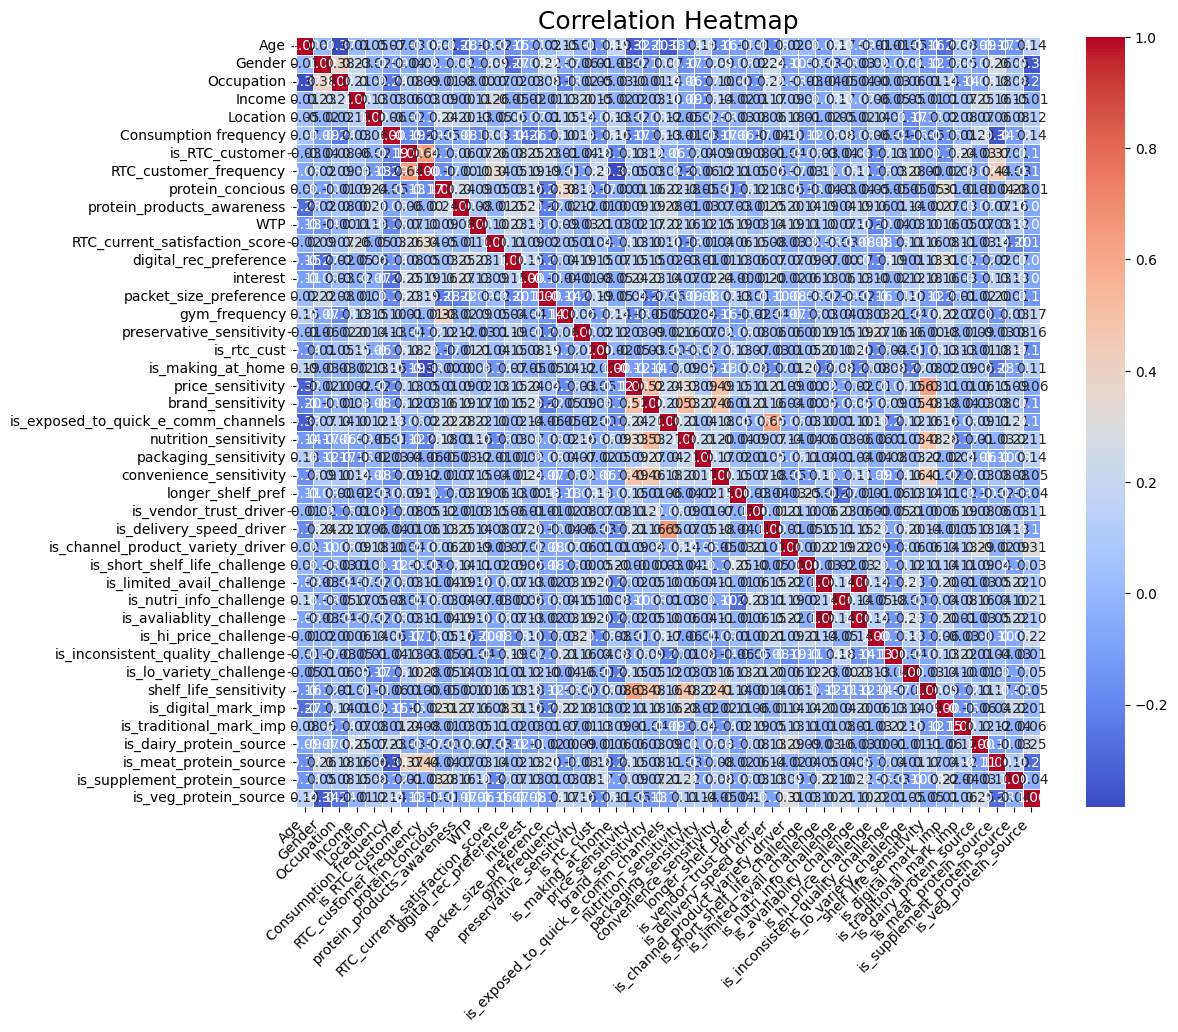

In [175]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = cleaned_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)

# Add title and labels
plt.title('Correlation Heatmap', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.show()

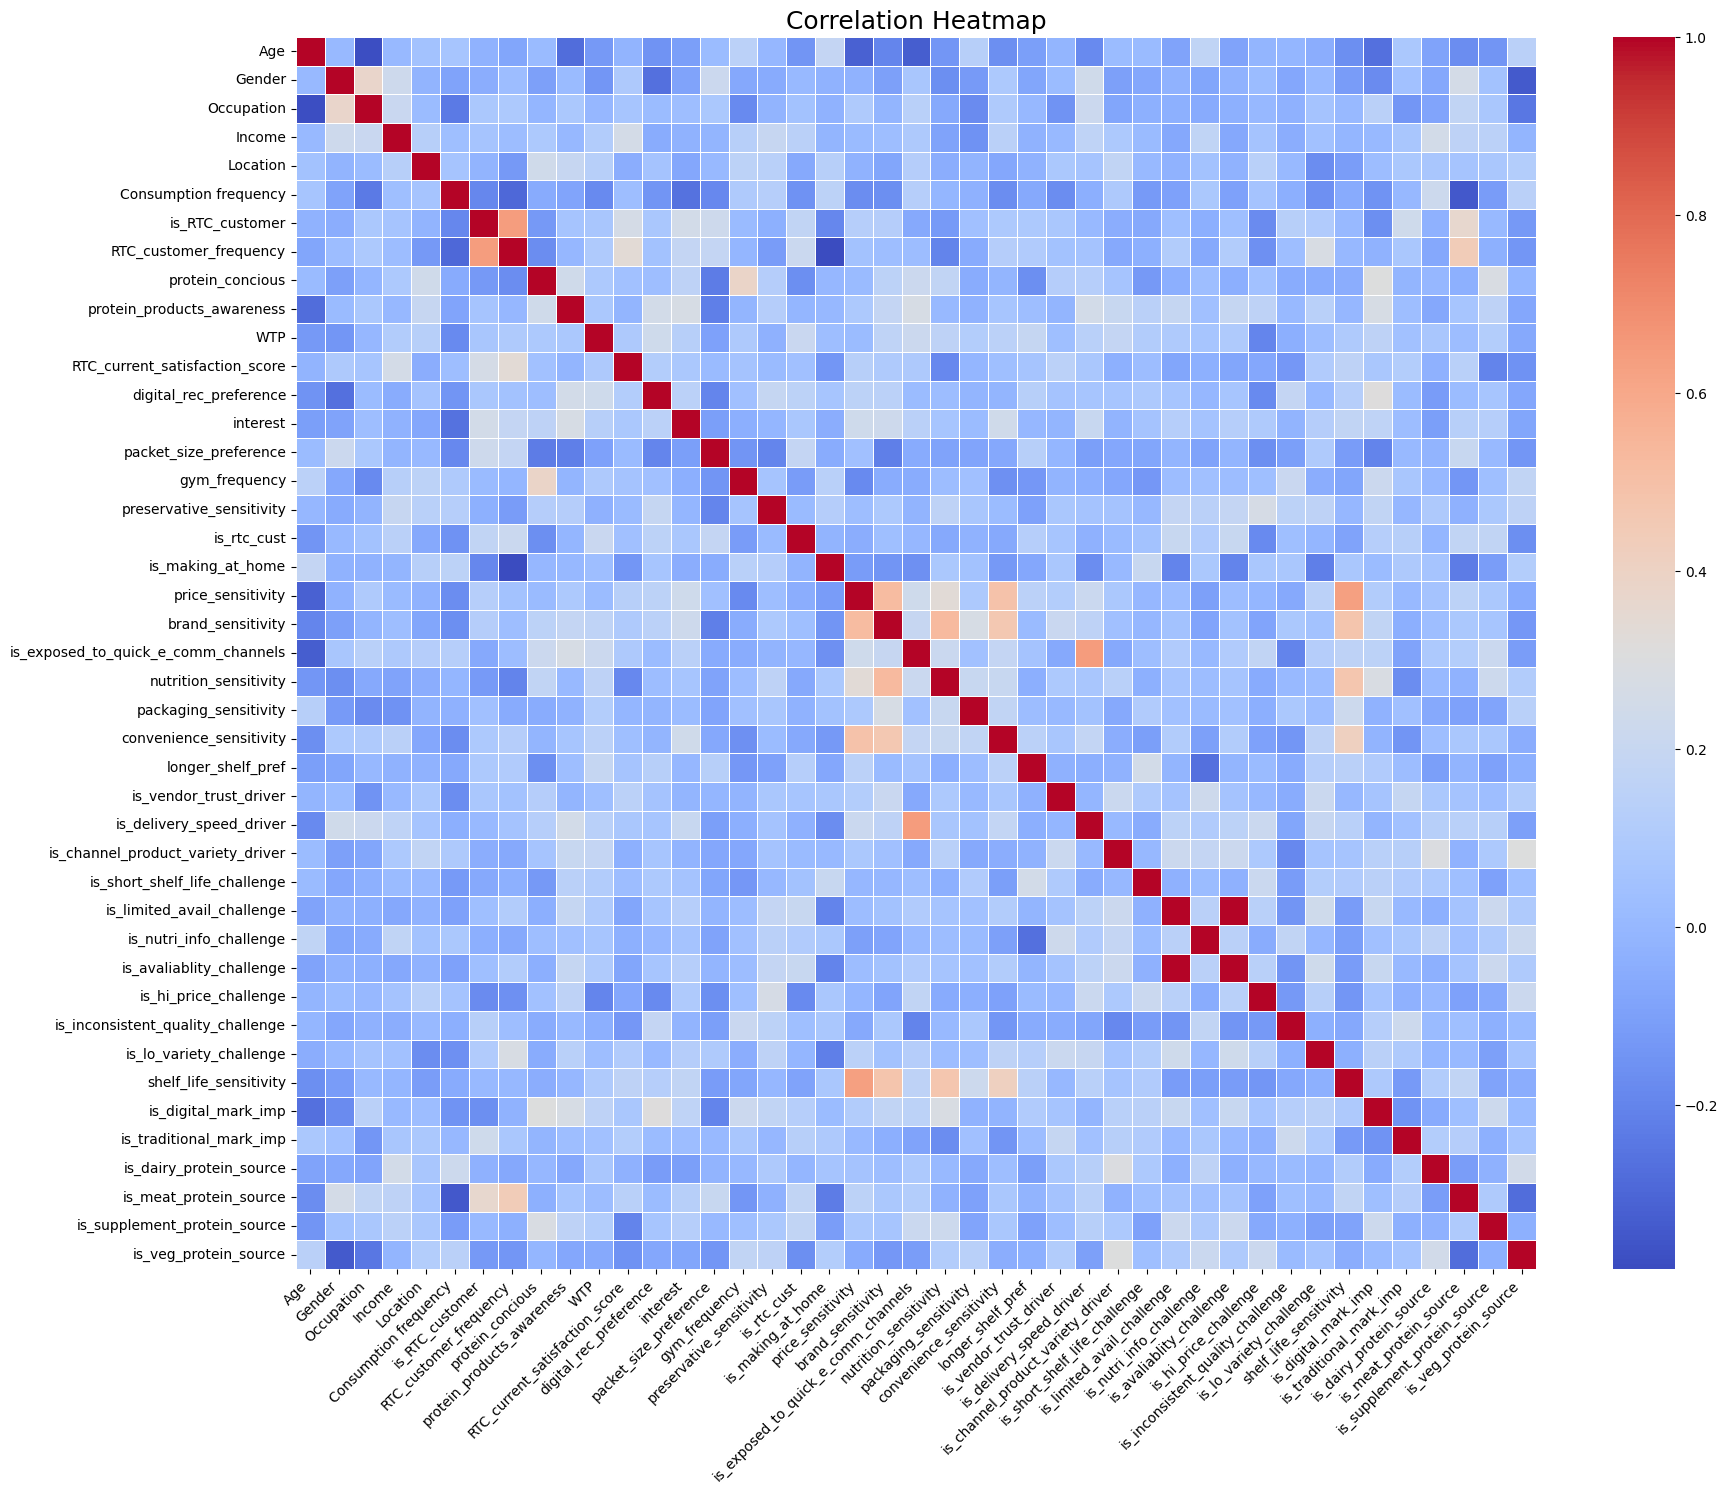

In [176]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = cleaned_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 16))

# Draw the heatmap without annotations
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=.5)

# Add title and labels
plt.title('Correlation Heatmap', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.show()

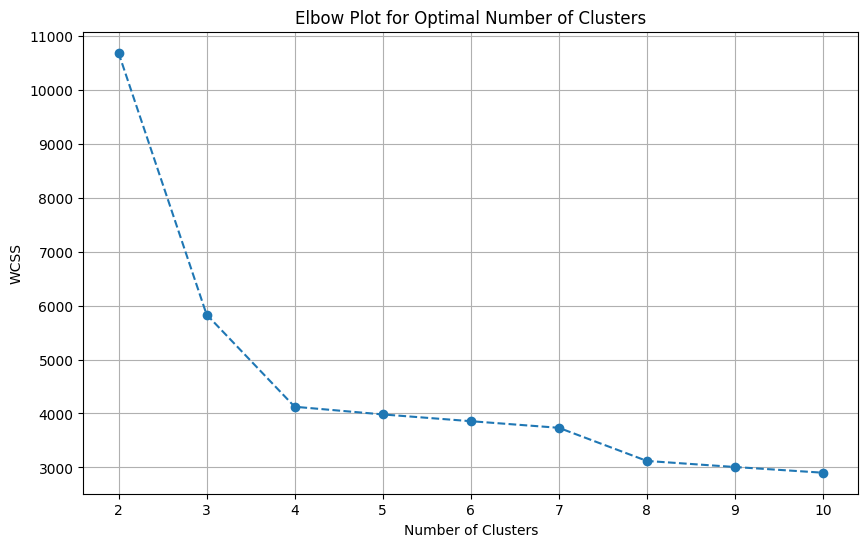

In [177]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

# Calculate WCSS for different number of clusters
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(cleaned_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Plot for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

In [178]:
import pandas as pd

# Fit the KMeans model with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
cleaned_data['Cluster'] = kmeans.fit_predict(cleaned_data)

# Calculate the means and size of each feature under each cluster
cluster_means = cleaned_data.groupby('Cluster').mean()
cluster_sizes = cleaned_data['Cluster'].value_counts().sort_index()

# Create a dataframe with means and sizes
cluster_summary = cluster_means.T


In [179]:
cluster_sizes.values

array([26, 50, 12, 25], dtype=int64)

In [180]:
size_df = pd.DataFrame(columns=['Cluster', 'Size'])
size_df['Size'] = cluster_sizes.values
size_df['Cluster'] = [0,1,2,3]
size_df

,Cluster,Size
0,0,26
1,1,50
2,2,12
3,3,25


In [181]:
cluster_summary

Cluster,0,1,2,3
Age,2.000000,2.10,1.916667,2.36
Gender,0.500000,0.70,0.583333,0.72
Occupation,4.038462,4.46,4.416667,4.16
Income,2.884615,2.98,3.208333,2.68
Location,1.730769,1.66,1.916667,1.56
Consumption frequency,2.807692,2.92,2.500000,3.64
is_RTC_customer,0.673077,0.67,0.666667,0.56
RTC_customer_frequency,1.423077,1.38,1.416667,1.12
protein_concious,2.576923,2.54,2.625000,2.32
protein_products_awareness,2.692308,2.92,2.833333,2.20


### Regression Analysis

In [182]:
cleaned_data.head()

,Age,Gender,Occupation,Income,Location,Consumption frequency,is_RTC_customer,RTC_customer_frequency,protein_concious,protein_products_awareness,...,is_inconsistent_quality_challenge,is_lo_variety_challenge,shelf_life_sensitivity,is_digital_mark_imp,is_traditional_mark_imp,is_dairy_protein_source,is_meat_protein_source,is_supplement_protein_source,is_veg_protein_source,Cluster
0,2,1,4,4.0,2,5,0.0,0.0,2.0,2,...,0,1,3,1,0,1,0,0,0,0
1,1,1,4,2.5,2,5,0.0,0.0,2.0,2,...,1,0,0,0,1,1,0,0,1,3
2,2,1,6,4.0,2,5,0.0,0.0,3.0,4,...,0,0,2,1,0,1,0,0,1,1
3,2,1,4,3.0,2,2,1.0,2.0,2.5,2,...,0,0,3,1,1,0,1,1,0,2
4,2,1,4,2.5,1,3,1.0,3.0,1.0,3,...,1,1,1,0,1,0,1,0,0,1


In [183]:
cleaned_data['interest']

0      1.0
1      0.0
2      0.0
3      1.0
4      1.0
      ... 
108    0.0
109    1.0
110    0.5
111    1.0
112    1.0
Name: interest, Length: 113, dtype: float64

In [184]:
import statsmodels.api as sm
from scipy import stats

X = cleaned_data.drop(['Cluster', 'interest'], axis=1)
Y = cleaned_data['interest']
x = sm.add_constant(X)
model = sm.OLS(Y, x)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               interest   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.062
Date:                Sun, 02 Mar 2025   Prob (F-statistic):              0.404
Time:                        21:26:23   Log-Likelihood:                -7.3574
No. Observations:                 113   AIC:                             98.71
Df Residuals:                      71   BIC:                             213.3
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [185]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe to store VIF values
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]


c:\Users\acer\anaconda3\envs\ml3\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



In [186]:
vif_data

,feature,VIF
0,Age,9.484048
1,Gender,6.411040
2,Occupation,12.805840
3,Income,19.457602
4,Location,10.999411
5,Consumption frequency,7.795095
6,is_RTC_customer,7.064977
7,RTC_customer_frequency,6.844674
8,protein_concious,20.909801
9,protein_products_awareness,13.060651


In [187]:
X.drop(['is_avaliablity_challenge', 'shelf_life_sensitivity'], axis=1, inplace=True)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,Age,9.341871
1,Gender,6.045742
2,Occupation,12.694617
3,Income,19.351268
4,Location,10.789657
5,Consumption frequency,7.793918
6,is_RTC_customer,6.810570
7,RTC_customer_frequency,6.844073
8,protein_concious,20.323554
9,protein_products_awareness,12.968116


In [188]:
# Identify columns with VIF greater than 10
high_vif_columns = vif_data[vif_data["VIF"] > 10]["feature"]

# Drop these columns from X
X_reduced = X.drop(columns=high_vif_columns)

# Display the reduced dataframe
X_reduced.head()

,Age,Gender,Consumption frequency,is_RTC_customer,RTC_customer_frequency,is_rtc_cust,is_making_at_home,is_exposed_to_quick_e_comm_channels,packaging_sensitivity,longer_shelf_pref,...,is_limited_avail_challenge,is_nutri_info_challenge,is_hi_price_challenge,is_inconsistent_quality_challenge,is_lo_variety_challenge,is_traditional_mark_imp,is_dairy_protein_source,is_meat_protein_source,is_supplement_protein_source,is_veg_protein_source
0,2,1,5,0.0,0.0,0,1,1,0,1.0,...,0,0,1,0,1,0,1,0,0,0
1,1,1,5,0.0,0.0,0,1,0,0,1.0,...,0,0,1,1,0,1,1,0,0,1
2,2,1,5,0.0,0.0,0,1,1,2,1.0,...,0,0,0,0,0,0,1,0,0,1
3,2,1,2,1.0,2.0,1,1,1,4,1.0,...,1,1,0,0,0,1,0,1,1,0
4,2,1,3,1.0,3.0,0,0,0,2,1.0,...,1,0,1,1,1,1,0,1,0,0


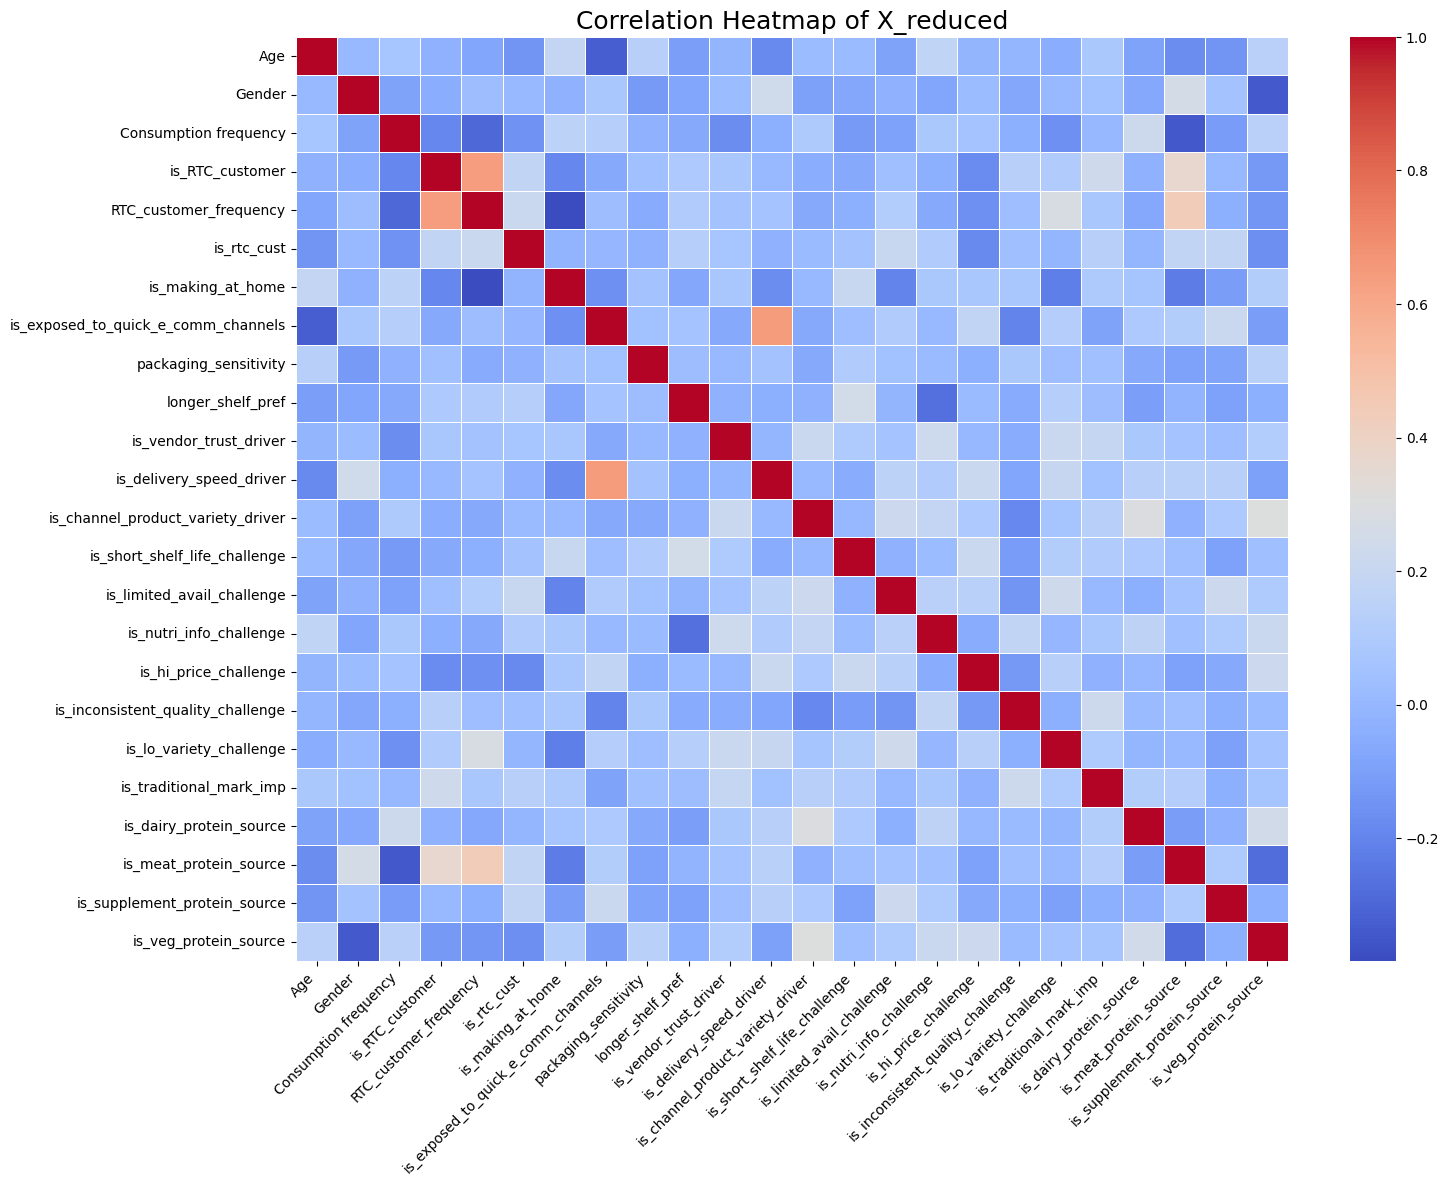

In [189]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix_reduced = X_reduced.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Draw the heatmap without annotations
sns.heatmap(corr_matrix_reduced, annot=False, cmap='coolwarm', linewidths=.5)

# Add title and labels
plt.title('Correlation Heatmap of X_reduced', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.show()

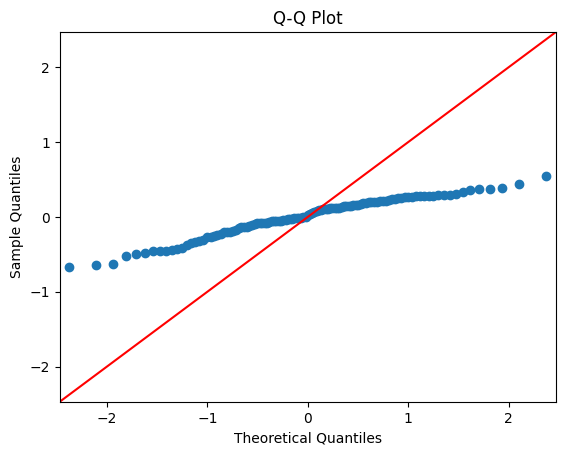

In [190]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

residuals = model.resid

# Generate a Q-Q plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [191]:
from scipy.stats import skew

# Calculate skewness for each numeric column in the dataframe
skewness = X.apply(lambda x: skew(x.dropna()) if x.dtype != 'O' else None)

# Display the skewness values
print(skewness)

Age                                    0.770077
Gender                                -0.392391
Occupation                            -0.831705
Income                                -0.381522
Location                              -1.303644
Consumption frequency                  0.058264
is_RTC_customer                       -0.610604
RTC_customer_frequency                 0.590488
protein_concious                      -0.473597
protein_products_awareness            -0.124867
WTP                                    1.169633
RTC_current_satisfaction_score        -0.034894
digital_rec_preference                 0.091736
packet_size_preference                 1.232798
gym_frequency                         -0.841266
preservative_sensitivity              -0.715843
is_rtc_cust                            3.986152
is_making_at_home                     -0.914736
price_sensitivity                     -0.761642
brand_sensitivity                     -0.886073
is_exposed_to_quick_e_comm_channels   -0

In [192]:
skew_values = X.apply(skew)

# Copy original dataframe
X_transformed = X.copy()

# Apply transformations
for col in X.columns:
    if skew_values[col] > 0.5:
        X_transformed[col] = np.sqrt(X[col])  # Square root transformation for right-skewed
    elif skew_values[col] < -0.5:
        X_transformed[col] = np.square(X[col])  # Square transformation for left-skewed

# Display transformed dataset
X_transformed.head()

,Age,Gender,Occupation,Income,Location,Consumption frequency,is_RTC_customer,RTC_customer_frequency,protein_concious,protein_products_awareness,...,is_nutri_info_challenge,is_hi_price_challenge,is_inconsistent_quality_challenge,is_lo_variety_challenge,is_digital_mark_imp,is_traditional_mark_imp,is_dairy_protein_source,is_meat_protein_source,is_supplement_protein_source,is_veg_protein_source
0,1.414214,1,16,4.0,4,5,0.0,0.000000,2.0,2,...,0.0,1.0,0,1.0,1,0,1,0,0.0,0
1,1.000000,1,16,2.5,4,5,0.0,0.000000,2.0,2,...,0.0,1.0,1,0.0,0,1,1,0,0.0,1
2,1.414214,1,36,4.0,4,5,0.0,0.000000,3.0,4,...,0.0,0.0,0,0.0,1,0,1,0,0.0,1
3,1.414214,1,16,3.0,4,2,1.0,1.414214,2.5,2,...,1.0,0.0,0,0.0,1,1,0,1,1.0,0
4,1.414214,1,16,2.5,1,3,1.0,1.732051,1.0,3,...,0.0,1.0,1,1.0,0,1,0,1,0.0,0


In [193]:

x = sm.add_constant(X_transformed)
model = sm.OLS(Y, x)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               interest   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     1.071
Date:                Sun, 02 Mar 2025   Prob (F-statistic):              0.392
Time:                        21:26:24   Log-Likelihood:                -8.0004
No. Observations:                 113   AIC:                             98.00
Df Residuals:                      72   BIC:                             209.8
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

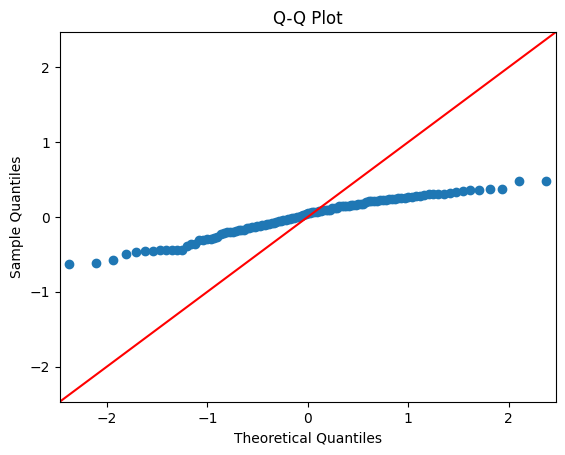

In [194]:

residuals = model.resid

# Generate a Q-Q plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [195]:
X.columns

Index(['Age', 'Gender', 'Occupation', 'Income', 'Location',
       'Consumption frequency', 'is_RTC_customer', 'RTC_customer_frequency',
       'protein_concious', 'protein_products_awareness', 'WTP',
       'RTC_current_satisfaction_score', 'digital_rec_preference',
       'packet_size_preference', 'gym_frequency', 'preservative_sensitivity',
       'is_rtc_cust', 'is_making_at_home', 'price_sensitivity',
       'brand_sensitivity', 'is_exposed_to_quick_e_comm_channels',
       'nutrition_sensitivity', 'packaging_sensitivity',
       'convenience_sensitivity', 'longer_shelf_pref',
       'is_vendor_trust_driver', 'is_delivery_speed_driver',
       'is_channel_product_variety_driver', 'is_short_shelf_life_challenge',
       'is_limited_avail_challenge', 'is_nutri_info_challenge',
       'is_hi_price_challenge', 'is_inconsistent_quality_challenge',
       'is_lo_variety_challenge', 'is_digital_mark_imp',
       'is_traditional_mark_imp', 'is_dairy_protein_source',
       'is_meat_protei

In [196]:
cleaned_data

,Age,Gender,Occupation,Income,Location,Consumption frequency,is_RTC_customer,RTC_customer_frequency,protein_concious,protein_products_awareness,...,is_inconsistent_quality_challenge,is_lo_variety_challenge,shelf_life_sensitivity,is_digital_mark_imp,is_traditional_mark_imp,is_dairy_protein_source,is_meat_protein_source,is_supplement_protein_source,is_veg_protein_source,Cluster
0,2,1,4,4.0,2,5,0.0,0.0,2.0,2,...,0,1,3,1,0,1,0,0,0,0
1,1,1,4,2.5,2,5,0.0,0.0,2.0,2,...,1,0,0,0,1,1,0,0,1,3
2,2,1,6,4.0,2,5,0.0,0.0,3.0,4,...,0,0,2,1,0,1,0,0,1,1
3,2,1,4,3.0,2,2,1.0,2.0,2.5,2,...,0,0,3,1,1,0,1,1,0,2
4,2,1,4,2.5,1,3,1.0,3.0,1.0,3,...,1,1,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2,1,6,4.0,2,5,0.0,0.0,3.0,2,...,0,0,3,1,0,0,1,0,0,1
109,1,1,4,4.0,0,1,1.0,2.0,1.0,3,...,1,1,3,1,1,0,1,0,0,1
110,2,1,4,3.0,2,5,1.0,1.0,2.0,2,...,0,0,3,0,1,1,1,1,1,0
111,1,0,4,4.0,2,3,1.0,2.0,2.0,3,...,0,1,1,0,0,1,1,0,1,0


Overall optimal price point: ₹48.13
Cluster 0 has only one unique WTP value
Optimal price point for Cluster 0: ₹70.00
Cluster 3 has only one unique WTP value
Optimal price point for Cluster 3: ₹40.00
Cluster 1 has only one unique WTP value
Optimal price point for Cluster 1: ₹50.00
Optimal price point for Cluster 2: ₹90.14


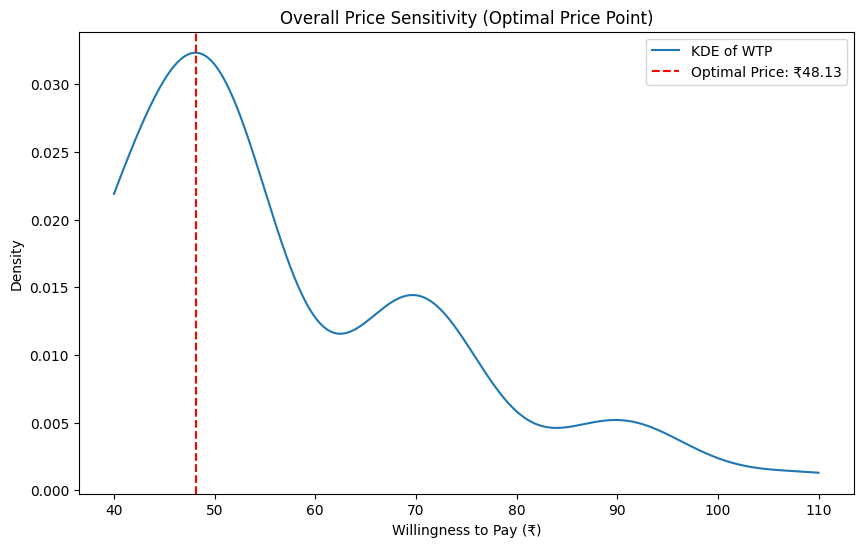

In [197]:
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

def optimal_price_point(wtp_series, grid_points=1000):
    """
    Estimate the optimal price point as the mode of the WTP distribution using KDE.
    
    Parameters:
    - wtp_series: pd.Series of willingness-to-pay values.
    - grid_points: number of points for the density grid.
    
    Returns:
    - optimal_price: The price corresponding to the highest density.
    """
    # Drop any missing values
    wtp_values = wtp_series.dropna()
    
    # Fit KDE to the data
    kde = gaussian_kde(wtp_values)
    
    # Create a grid spanning from min to max of WTP values
    grid = np.linspace(wtp_values.min(), wtp_values.max(), grid_points)
    density = kde(grid)
    
    # The optimal price is the grid value with maximum density
    optimal_price = grid[np.argmax(density)]
    return optimal_price


# Overall optimal price point
overall_optimal = optimal_price_point(cleaned_data['WTP'])
print(f'Overall optimal price point: ₹{overall_optimal:.2f}')

# Optimal price points for each cluster
cluster_optimal_prices = {}
for cluster in cleaned_data['Cluster'].unique():
    cluster_data = cleaned_data[cleaned_data['Cluster'] == cluster]
    if cluster_data['WTP'].unique().size == 1:
        print(f'Cluster {cluster} has only one unique WTP value')
        v = cluster_data['WTP'].unique()[0]
        print(f'Optimal price point for Cluster {cluster}: ₹{v:.2f}')
    else:
        optimal_cluster_price = optimal_price_point(cluster_data['WTP'])
        cluster_optimal_prices[cluster] = optimal_cluster_price
        print(f'Optimal price point for Cluster {cluster}: ₹{optimal_cluster_price:.2f}')


plt.figure(figsize=(10, 6))
wtp_values = cleaned_data['WTP'].dropna()
kde = gaussian_kde(wtp_values)
grid = np.linspace(wtp_values.min(), wtp_values.max(), 1000)
plt.plot(grid, kde(grid), label='KDE of WTP')
plt.axvline(overall_optimal, color='red', linestyle='--', label=f'Optimal Price: ₹{overall_optimal:.2f}')
plt.xlabel('Willingness to Pay (₹)')
plt.ylabel('Density')
plt.title('Overall Price Sensitivity (Optimal Price Point)')
plt.legend()
plt.show()

In [198]:
cluster_data['WTP'].unique()[0]

100.0

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def compute_van_westendorp_lines(data, col_too_cheap, col_cheap, col_expensive, col_too_expensive, num_points=200):
    """
    Computes Van Westendorp lines for a given subset of data.
    
    Parameters:
    -----------
    data : pd.DataFrame
        Subset of your dataset (e.g., entire data or a single cluster).
    col_too_cheap : str
        Column name for 'too cheap' price.
    col_cheap : str
        Column name for 'cheap/bargain' price.
    col_expensive : str
        Column name for 'expensive' price.
    col_too_expensive : str
        Column name for 'too expensive' price.
    num_points : int
        Number of points to evaluate along the price axis.
        
    Returns:
    --------
    price_grid : np.array
        Range of prices used for plotting.
    lines : dict of np.array
        Keys: 'too_cheap', 'cheap', 'expensive', 'too_expensive'.
        Values: arrays representing the proportion of respondents for each line.
    """
    # Drop NaNs in the four columns
    df_sub = data[[col_too_cheap, col_cheap, col_expensive, col_too_expensive]].dropna()
    
    # If no valid rows remain, return empty
    if df_sub.empty:
        return np.array([]), {}
    
    # Determine the min and max price from all four columns
    min_price = df_sub.min().min()
    max_price = df_sub.max().max()
    
    # Create a price grid
    price_grid = np.linspace(min_price, max_price, num_points)
    
    # Initialize lines
    too_cheap_line = []
    cheap_line = []
    expensive_line = []
    too_expensive_line = []
    
    # For each price p, compute proportion of respondents who see p as:
    # "Too Cheap": p < price_too_cheap
    # "Cheap": p < price_cheap
    # "Expensive": p > price_expensive
    # "Too Expensive": p > price_too_expensive
    
    for p in price_grid:
        # Too cheap = proportion for which p < 'too cheap' threshold
        too_cheap_line.append((df_sub[col_too_cheap] > p).mean())
        
        # Cheap = proportion for which p < 'cheap' threshold
        cheap_line.append((df_sub[col_cheap] > p).mean())
        
        # Expensive = proportion for which p > 'expensive' threshold
        expensive_line.append((df_sub[col_expensive] < p).mean())
        
        # Too expensive = proportion for which p > 'too expensive' threshold
        too_expensive_line.append((df_sub[col_too_expensive] < p).mean())
    
    lines = {
        'too_cheap': np.array(too_cheap_line),
        'cheap': np.array(cheap_line),
        'expensive': np.array(expensive_line),
        'too_expensive': np.array(too_expensive_line)
    }
    
    return price_grid, lines


def find_intersection_points(price_grid, line1, line2):
    """
    Finds intersection points between two lines using sign changes.
    Returns the x-values (prices) of intersection, interpolated linearly.
    """
    # Ensure arrays are np.array
    line1 = np.array(line1)
    line2 = np.array(line2)
    
    # Indices where line1 - line2 changes sign
    diff = line1 - line2
    sign_changes = np.where(np.diff(np.sign(diff)) != 0)[0]
    
    intersection_prices = []
    
    for idx in sign_changes:
        # Linear interpolation between idx and idx+1
        x1, x2 = price_grid[idx], price_grid[idx + 1]
        y1_line1, y1_line2 = line1[idx], line2[idx]
        y2_line1, y2_line2 = line1[idx + 1], line2[idx + 1]
        
        # We want to solve line1(t) = line2(t)
        # slope_line1 = (y2_line1 - y1_line1) / (x2 - x1)
        # slope_line2 = (y2_line2 - y1_line2) / (x2 - x1)
        # Let alpha be fraction along x from x1
        # y1_line1 + alpha*(y2_line1 - y1_line1) = y1_line2 + alpha*(y2_line2 - y1_line2)
        
        # We'll do a simpler approach:
        # diff(t) = y1_line1 + alpha*(y2_line1 - y1_line1) - (y1_line2 + alpha*(y2_line2 - y1_line2)) = 0
        # alpha = ...
        
        denom = ( (y2_line1 - y1_line1) - (y2_line2 - y1_line2) )
        if denom == 0:
            # Parallel lines in this segment
            intersection_prices.append((x1 + x2) / 2.0)
        else:
            alpha = ( (y1_line2 - y1_line1) ) / denom
            intersection_x = x1 + alpha*(x2 - x1)
            intersection_prices.append(intersection_x)
    
    return intersection_prices


def plot_van_westendorp(price_grid, lines, cluster_label='Overall'):
    """
    Plots the four Van Westendorp lines and marks key intersection points.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(price_grid, lines['too_cheap'], label='Too Cheap')
    plt.plot(price_grid, lines['cheap'], label='Cheap')
    plt.plot(price_grid, lines['expensive'], label='Expensive')
    plt.plot(price_grid, lines['too_expensive'], label='Too Expensive')
    plt.title(f'Van Westendorp Price Sensitivity - {cluster_label}')
    plt.xlabel('Price')
    plt.ylabel('Proportion of Respondents')
    
    # Intersection points of interest:
    # 1) Too Cheap & Expensive  -> Lower Bound
    # 2) Cheap & Too Expensive  -> Upper Bound
    # 3) Cheap & Expensive      -> Indifference Price
    # (Sometimes also the intersection of Too Cheap & Too Expensive is used)
    
    # Lower Bound
    lb_points = find_intersection_points(price_grid, lines['too_cheap'], lines['expensive'])
    for xval in lb_points:
        plt.axvline(xval, color='green', linestyle='--', alpha=0.7)
        plt.text(xval, 0.5, f'LB={xval:.2f}', rotation=90, color='green')
    
    # Upper Bound
    ub_points = find_intersection_points(price_grid, lines['cheap'], lines['too_expensive'])
    for xval in ub_points:
        plt.axvline(xval, color='red', linestyle='--', alpha=0.7)
        plt.text(xval, 0.5, f'UB={xval:.2f}', rotation=90, color='red')
    
    # Indifference Price
    indiff_points = find_intersection_points(price_grid, lines['cheap'], lines['expensive'])
    for xval in indiff_points:
        plt.axvline(xval, color='blue', linestyle='--', alpha=0.7)
        plt.text(xval, 0.3, f'IP={xval:.2f}', rotation=90, color='blue')
    
    plt.legend()
    plt.show()
